# Title: Bank Marketing
### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

In [4]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import warnings
warnings.filterwarnings("ignore")

#Setting to view all columns
pd.set_option('display.max_columns', None)

In [6]:
from google.colab import files
uploaded = files.upload()

Saving bank-full - Copy.xlsx to bank-full - Copy (1).xlsx


In [204]:
#Reading the dataset and coverting it into a dataframe
#df= pd.read_csv('F:/capstone_project/Group_2_bank/bank-full - Copy.csv')
import io
df = pd.read_excel(io.BytesIO(uploaded['bank-full - Copy.xlsx']))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [205]:
#Checking the number of rows and columns
df.shape

(45211, 17)

In [206]:
#Checking non-null values and the type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Note:
The Data set has 45211 rows and 17 columns(including target column).\
As per the info, \
Numerical features are: ('age','balance', 'day', 'duration', 'campaign', 'pdays','previous')\
Categorical features are:('job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome')\
Info is showing no null values are there in table, but some columns are having 'unknown' as entry.So we will see the details further.

In [207]:
#Decriptive Statistics of numerical variables
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


By looking at the summary, it can be said that all the numerical features are right skewed.\
Let's visualise it with the help of distribution plot and box plot.

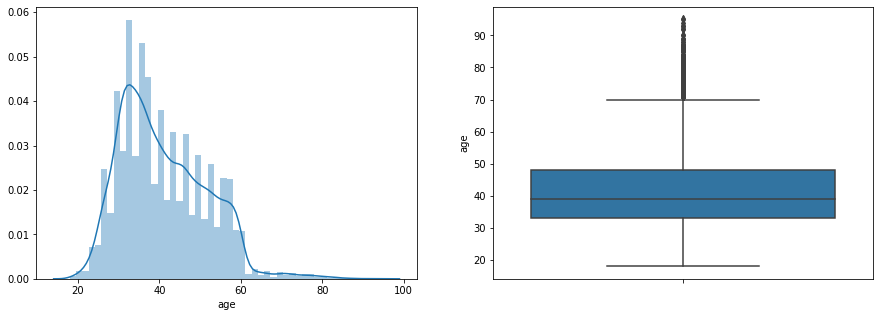

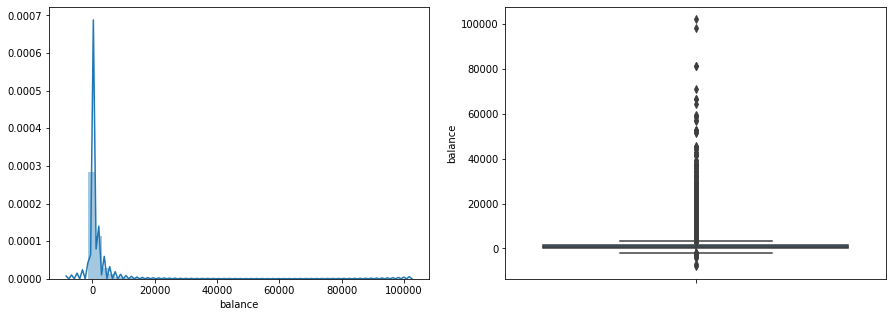

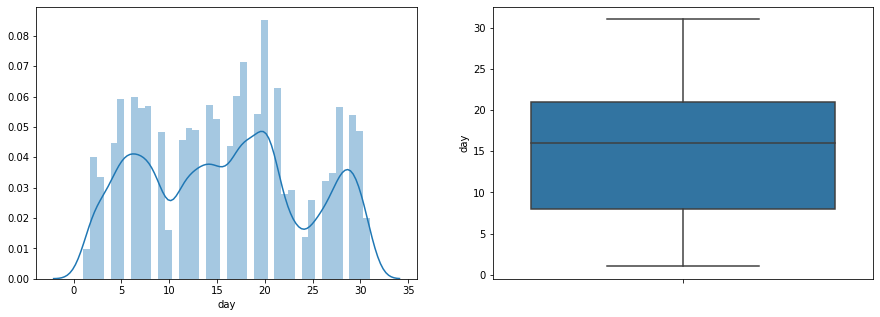

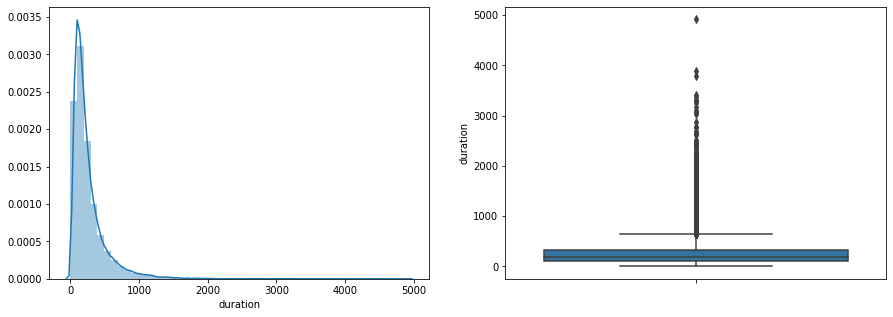

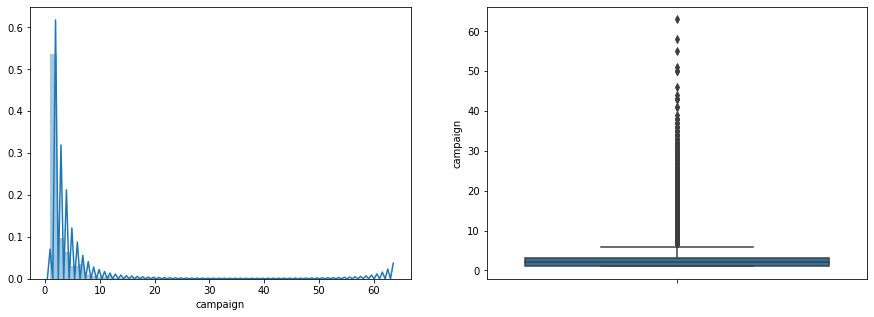

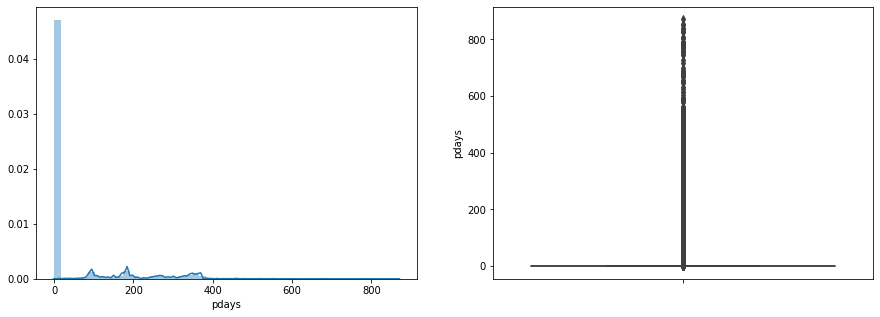

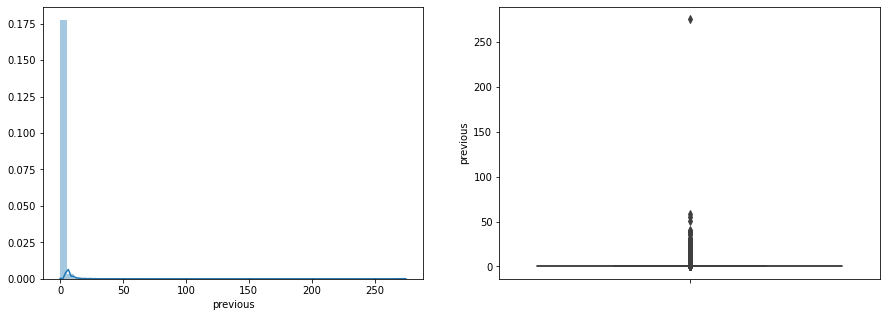

In [208]:
#Visualization of each numerical variable
num_cols = ['age','balance', 'day', 'duration', 'campaign', 'pdays','previous']

for i in num_cols:
    fig, ax1 = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(df[i],ax=ax1[0])
    sns.boxplot(y=i,data = df,ax=ax1[1])
    plt.show()

Except 'day', all the numerical features have high outliers.

In [209]:
# Target Variable
len(df[df['y']=='yes']['y'])*100/len(df['y'])

11.698480458295547

Out of the total contacted customers, approximately 11.7% have subscribed. It seems correct representation with real life situation. So we would not call it imbalanced. 

### Now lets visualise all the independent features one by one and its impact on target variable 'y'

#### Age

In [210]:
df['age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 92, 93, 94, 95])

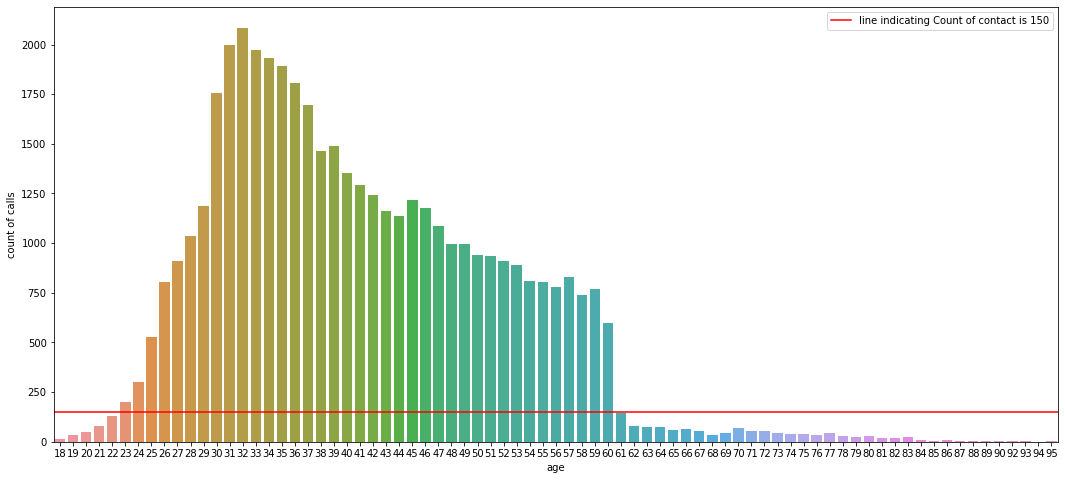

In [211]:
plt.figure(figsize = (18,8))
sns.countplot(df['age'])
plt.axhline(y=150, color = 'r')
plt.legend(labels=['line indicating Count of contact is 150'])
plt.ylabel('count of calls')
plt.show()

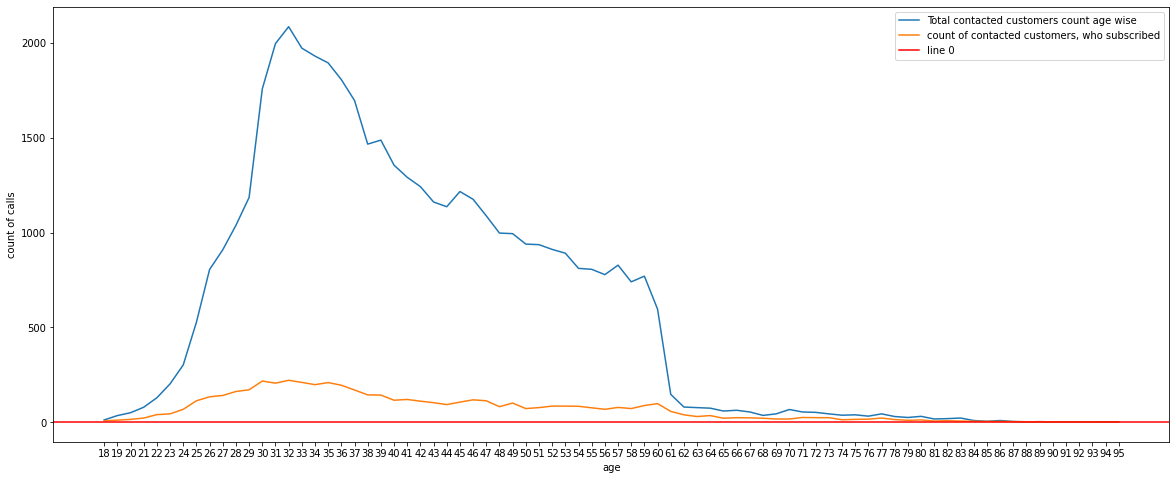

In [212]:
plt.figure(figsize = (20,8))
sns.lineplot(data=df['age'].value_counts())
sns.lineplot(data=df[df['y']=='yes']['age'].value_counts())
plt.xticks(np.arange(18, 96, step=1))
plt.axhline(y=0, color = 'r')
plt.legend(labels=['Total contacted customers count age wise','count of contacted customers, who subscribed','line 0'])
plt.ylabel('count of calls')
plt.xlabel('age')
plt.show()

Text(0.5, 0, 'has the client subscribed a term deposit?')

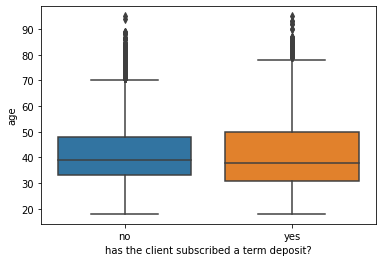

In [213]:
sns.boxplot(y=df['age'], x=df['y'])
plt.xlabel('has the client subscribed a term deposit?')

Here, we can say that calls have been made to the customers of all age from 18 to 95 years. \
Most of the call have been made to customers in the age group of 23 years to 60 years. \
So, it can be said that bank tried to target working class customers.\
The number of people who have subscribed in the same age group (23 to 60) are more.\
The subscription success rates of differnt age groups can be analysed by binning age into categories as follows.

In [214]:
df['age_group'] = df['age'].apply(lambda x : '18_to22' if x < 23 else ('23_to60' if x<61 else '61_to_95'))

Text(0, 0.5, 'success percentage of subscription w.r.t calls')

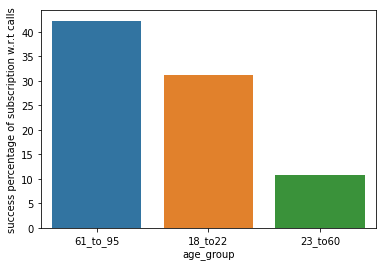

In [215]:
df_age = pd.DataFrame(df[df['y']=='yes']['age_group'].value_counts()*100/df['age_group'].value_counts())
df_age_new = pd.DataFrame({'age_group': list(df_age.index),'Percentage':df_age['age_group']})
sns.barplot(y='Percentage', x='age_group',data=df_age_new,order=df_age['age_group'].sort_values(ascending=False).index)
plt.ylabel('success percentage of subscription w.r.t calls')

Above plot shows success rate of subscription in each age group. Here we can see that the age group (23 to 60), who have been contacted the most, have very less success rate(around 10%).\
Less effort was needed to convince the people aged between 18 to 22 and 61 to 95.People in this group are more likely to subscribe and can be targetted.

#### Job

In [216]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

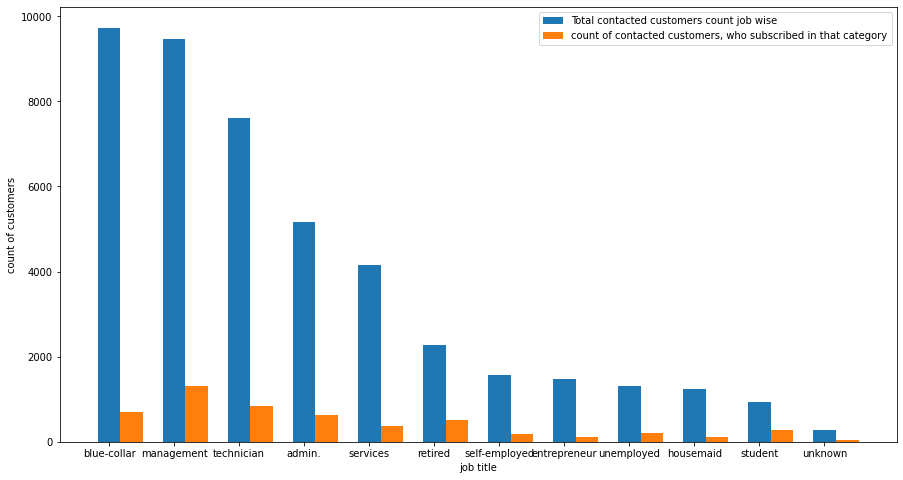

In [217]:
job = list(df['job'].value_counts().index)
total_count = list(pd.concat([df['job'].value_counts(), df[df['y']=='yes']['job'].value_counts()],sort= False, axis = 1).iloc[:,0])
total_count_subscribed = list(pd.concat([df['job'].value_counts(), df[df['y']=='yes']['job'].value_counts()],sort= False, axis = 1).iloc[:,1])
plt.figure(figsize = (15,8))
bar_width = 0.35
x_pos = np.arange(len(df['job'].value_counts()))
plt.bar(x_pos,total_count,width = bar_width)
plt.bar(x_pos + bar_width, total_count_subscribed, width = bar_width)
plt.xticks(x_pos, job)
plt.ylabel('count of customers')
plt.xlabel('job title')
plt.legend(labels=['Total contacted customers count job wise','count of contacted customers, who subscribed in that category'])
plt.show()

Management and technicians have more subscriptions than blue-collar job holders though blue-collars have been contacted the most.

Let's check success rate in this feature also

Text(0, 0.5, 'success percentage of subscription w.r.t calls')

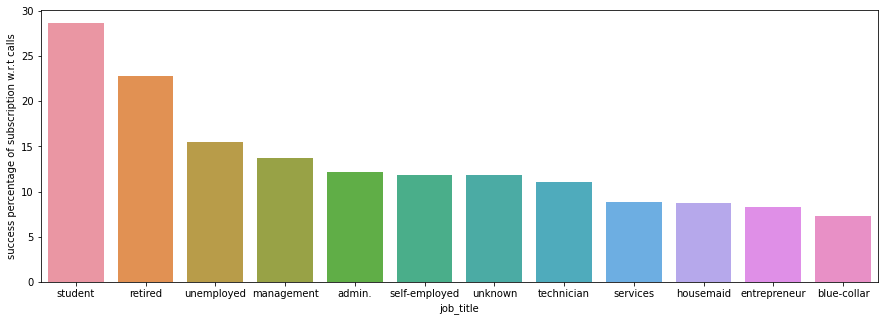

In [218]:
df_job = pd.DataFrame(df[df['y']=='yes']['job'].value_counts()*100/df['job'].value_counts())
df_job_new = pd.DataFrame({'job_title': list(df_job.index),'Percentage':df_job['job']})
plt.figure(figsize=(15,5))
sns.barplot(y='Percentage', x='job_title',data=df_job_new,order=df_job['job'].sort_values(ascending=False).index)
plt.ylabel('success percentage of subscription w.r.t calls')

Surprisingly, Students and retired people have very high success rate of subscription. We can relate it to age plot also.

#### Marital

In [219]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

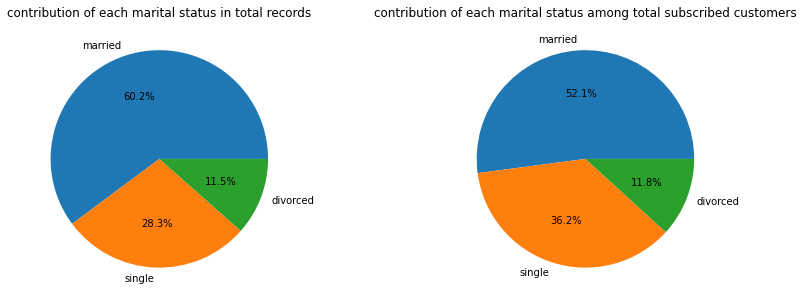

In [220]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
plt.pie(df['marital'].value_counts(), labels = ['married','single','divorced'],autopct='%1.1f%%')
plt.title('contribution of each marital status in total records')
plt.subplot(1,2,2)
plt.pie(df[df['y']=='yes']['marital'].value_counts(), labels = ['married','single','divorced'],autopct='%1.1f%%')
plt.title('contribution of each marital status among total subscribed customers')
plt.show()

Text(0, 0.5, 'success percentage of subscription wrt calls')

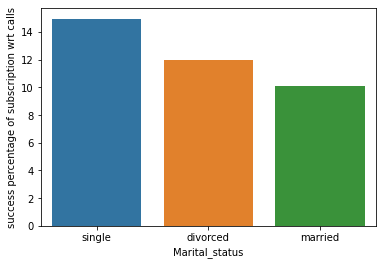

In [221]:
df_marital = pd.DataFrame(df[df['y']=='yes']['marital'].value_counts()*100/df['marital'].value_counts())
df_marital_new = pd.DataFrame({'Marital_status': list(df_marital.index),'Percentage':df_marital['marital']})
sns.barplot(y='Percentage', x='Marital_status',data=df_marital_new,order=df_marital['marital'].sort_values(ascending=False).index)
plt.ylabel('success percentage of subscription wrt calls')

The customers who are single have slightly higher chances of subscription of the term deposit compared to customers who are married or divorced (or widowed).

#### Education

In [222]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

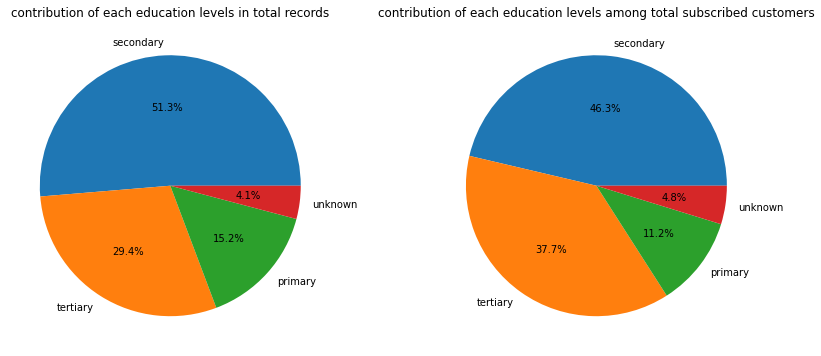

In [223]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.pie(df['education'].value_counts(), labels = ['secondary','tertiary','primary','unknown'],autopct='%1.1f%%')
plt.title('contribution of each education levels in total records')
plt.subplot(1,2,2)
plt.pie(df[df['y']=='yes']['education'].value_counts(), labels = ['secondary','tertiary','primary','unknown'],autopct='%1.1f%%')
plt.title('contribution of each education levels among total subscribed customers')
plt.show()

Text(0, 0.5, 'success percentage of subscription wrt calls')

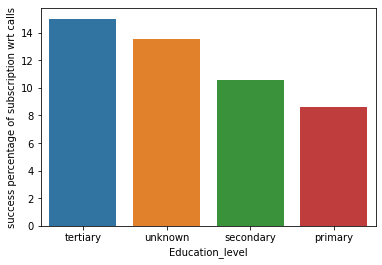

In [224]:
df_edu = pd.DataFrame(df[df['y']=='yes']['education'].value_counts()*100/df['education'].value_counts())
df_edu_new = pd.DataFrame({'Education_level': list(df_edu.index),'Percentage':df_edu['education']})
sns.barplot(y='Percentage', x='Education_level',data=df_edu_new,order=df_edu['education'].sort_values(ascending=False).index)
plt.ylabel('success percentage of subscription wrt calls')

The customers who have tertiary level of education have slightly higher chances of subscription of the term deposit compared to customers who are married or divorced (or widowed).

#### Default

In [225]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

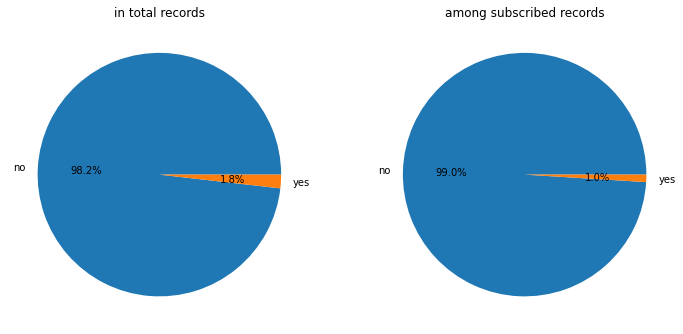

In [226]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.pie(df['default'].value_counts(), labels = ['no','yes'],autopct='%1.1f%%')
plt.title('in total records')
plt.subplot(1,2,2)
plt.pie(df[df['y']=='yes']['default'].value_counts(), labels = ['no','yes'],autopct='%1.1f%%')
plt.title('among subscribed records')
plt.show()

Text(0, 0.5, 'success percentage of subscription wrt calls')

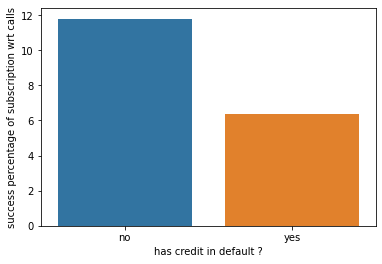

In [227]:
df_default = pd.DataFrame(df[df['y']=='yes']['default'].value_counts()*100/df['default'].value_counts())
df_default_new = pd.DataFrame({'credit_default': list(df_default.index),'Percentage':df_default['default']})
sns.barplot(y='Percentage', x='credit_default',data=df_default_new,order=df_default['default'].sort_values(ascending=False).index)
plt.xlabel('has credit in default ?')
plt.ylabel('success percentage of subscription wrt calls')

We can conclude here that those, who are not having credit in default, are more likely to subscribe.

#### Balance

Text(0, 0.5, 'average yearly balance, in euros')

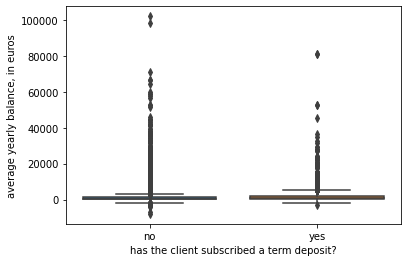

In [228]:
sns.boxplot(y=df['balance'],x=df['y'])
plt.xlabel('has the client subscribed a term deposit?')
plt.ylabel('average yearly balance, in euros')

In [229]:
neg_bal = len(df[df['balance']<0]['balance'])
neg_bal_sub = len(df[(df['y']=='yes') & (df['balance']<0)]['balance'])
print('percentage of people having negative balance and subscribed',round(neg_bal_sub*100/neg_bal,2),'%')

percentage of people having negative balance and subscribed 5.58 %


As per the above plots, y does not get affected much by balance. However one pattern can be seen that people having balance negative are very less likely to subscribe.

#### Housing

In [230]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [231]:
df[df['y']=='yes']['housing'].value_counts()

no     3354
yes    1935
Name: housing, dtype: int64

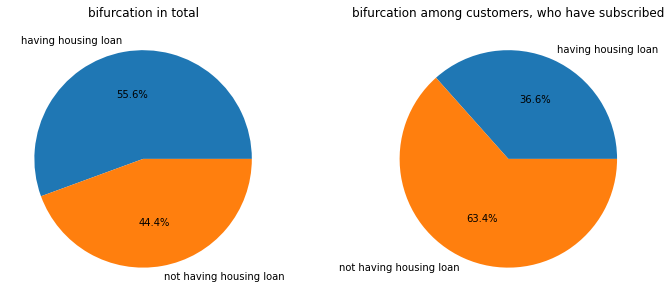

In [232]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
a= 'having housing loan'; b= 'not having housing loan'
plt.pie(df['housing'].value_counts(), labels = [a,b],autopct='%1.1f%%')
plt.title('bifurcation in total')
plt.subplot(1,2,2)
plt.pie(df[df['y']=='yes']['housing'].value_counts().sort_values(), labels = [a,b],autopct='%1.1f%%')
plt.title('bifurcation among customers, who have subscribed')
plt.show()

Text(0, 0.5, 'success percentage of subscription wrt calls')

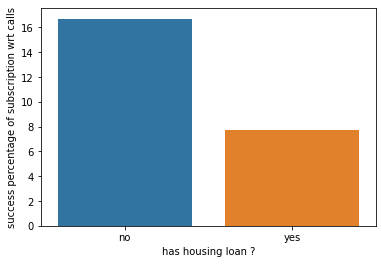

In [233]:
df_housing = pd.DataFrame(df[df['y']=='yes']['housing'].value_counts()*100/df['housing'].value_counts())
df_housing_new = pd.DataFrame({'Housing_Loan': list(df_housing.index),'Percentage':df_housing['housing']})
sns.barplot(y='Percentage', x='Housing_Loan',data=df_housing_new,order=df_housing['housing'].sort_values(ascending=False).index)
plt.xlabel('has housing loan ?')
plt.ylabel('success percentage of subscription wrt calls')

From the above plot it is evident that people not having housing loan are more likely to subscribe term deposit.

#### Loan

In [234]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [235]:
df[df['y']=='yes']['loan'].value_counts()

no     4805
yes     484
Name: loan, dtype: int64

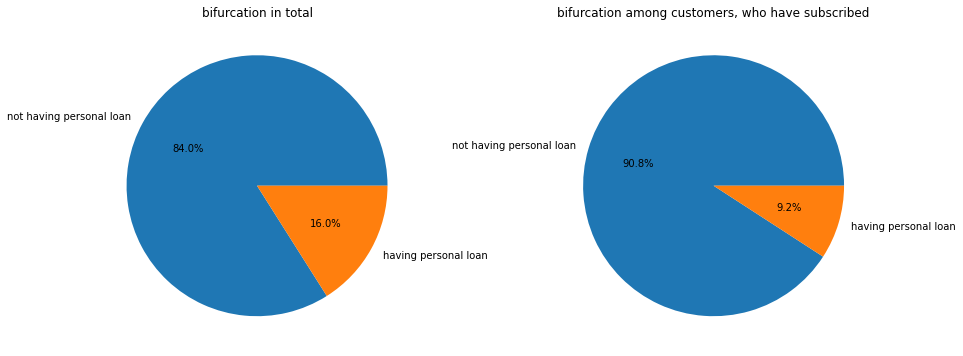

In [236]:
plt.figure(figsize = (15,6))
a='not having personal loan';b='having personal loan'
plt.subplot(1,2,1)
plt.pie(df['loan'].value_counts(), labels = [a,b],autopct='%1.1f%%')
plt.title('bifurcation in total')
plt.subplot(1,2,2)
plt.pie(df[df['y']=='yes']['loan'].value_counts(), labels = [a,b],autopct='%1.1f%%')
plt.title('bifurcation among customers, who have subscribed')
plt.show()

Text(0, 0.5, 'success percentage of subscription wrt calls')

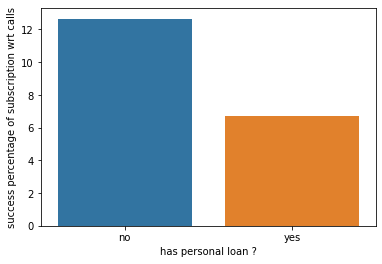

In [237]:
df_loan = pd.DataFrame(df[df['y']=='yes']['loan'].value_counts()*100/df['loan'].value_counts())
df_loan_new = pd.DataFrame({'Loan': list(df_loan.index),'Percentage':df_loan['loan']})
sns.barplot(y='Percentage', x='Loan',data=df_loan_new,order=df_loan['loan'].sort_values(ascending=False).index)
plt.xlabel('has personal loan ?')
plt.ylabel('success percentage of subscription wrt calls')

Above charts shows that person not having personal loan are more likely to subscribe term deposit.

#### Contact

In [238]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [239]:
df[df['y']=='yes']['contact'].value_counts()

cellular     4369
unknown       530
telephone     390
Name: contact, dtype: int64

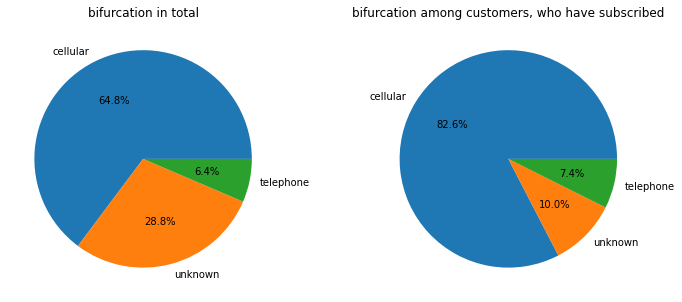

In [240]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.pie(df['contact'].value_counts(), labels = ['cellular','unknown','telephone'],autopct='%1.1f%%')
plt.title('bifurcation in total')
plt.subplot(1,2,2)
plt.pie(df[df['y']=='yes']['contact'].value_counts(), labels = ['cellular','unknown','telephone'],autopct='%1.1f%%')
plt.title('bifurcation among customers, who have subscribed')
plt.show()

Text(0, 0.5, 'success percentage of subscription wrt calls')

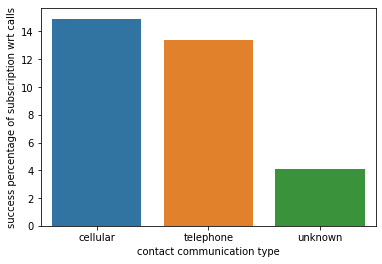

In [241]:
df_cont = pd.DataFrame(df[df['y']=='yes']['contact'].value_counts()*100/df['contact'].value_counts())
df_cont_new = pd.DataFrame({'contact': list(df_cont.index),'Percentage':df_cont['contact']})
sns.barplot(y='Percentage', x='contact',data=df_cont_new,order=df_cont['contact'].sort_values(ascending=False).index)
plt.xlabel('contact communication type')
plt.ylabel('success percentage of subscription wrt calls')

The mode of contact does not seem to be very significant with respect to rate the of subscription, Also a large part of this data is 'unknown' so we cannot conclude much about this feature.

#### Day

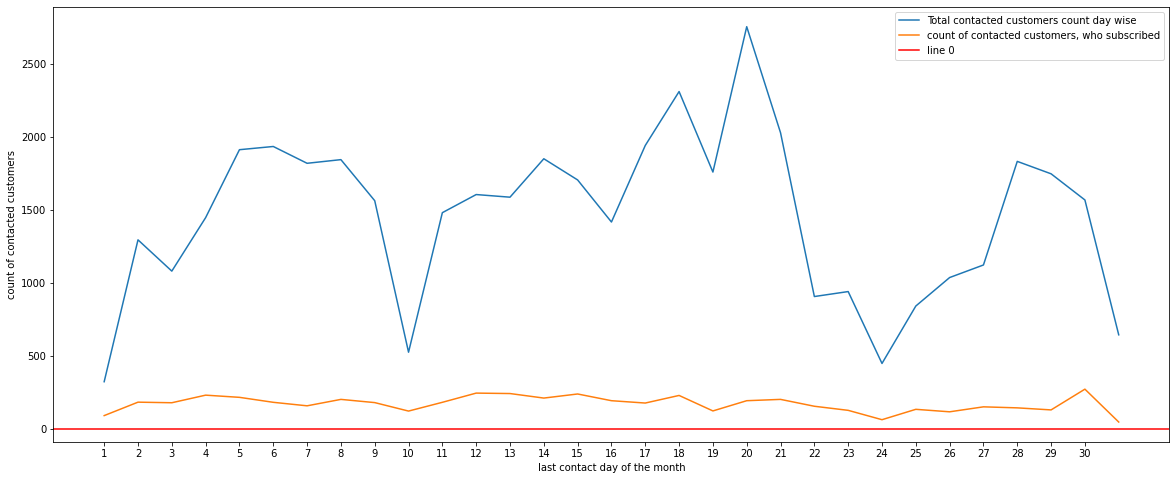

In [242]:
plt.figure(figsize = (20,8))
sns.lineplot(data=df['day'].value_counts())
sns.lineplot(data=df[df['y']=='yes']['day'].value_counts())
plt.xticks(np.arange(1, 31, step=1))
plt.axhline(y=0, color = 'r')
plt.legend(labels=['Total contacted customers count day wise','count of contacted customers, who subscribed','line 0'])
plt.ylabel('count of contacted customers')
plt.xlabel('last contact day of the month')
plt.show()

Text(0.5, 0, 'has the client subscribed a term deposit?')

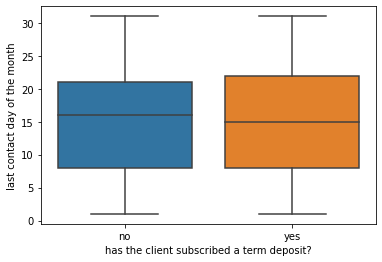

In [243]:
sns.boxplot(y=df['day'],x=df['y'])
plt.ylabel('last contact day of the month')
plt.xlabel('has the client subscribed a term deposit?')

Not much differerence is there in day wise subscribed customers. So nothing can be concluded here.

#### Month

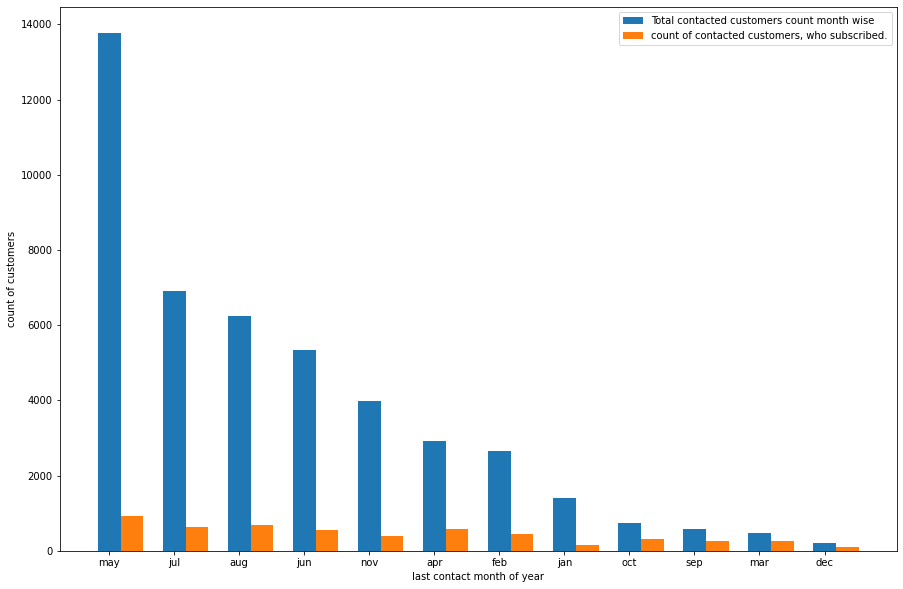

In [244]:
month = list(df['month'].value_counts().index)
total_count = list(pd.concat([df['month'].value_counts(), df[df['y']=='yes']['month'].value_counts()],sort= False, axis = 1).iloc[:,0])
total_count_subscribed = list(pd.concat([df['month'].value_counts(), df[df['y']=='yes']['month'].value_counts()],sort= False, axis = 1).iloc[:,1])
plt.figure(figsize = (15,10))
bar_width = 0.35
x_pos = np.arange(len(df['month'].value_counts()))
plt.bar(x_pos,total_count,width = bar_width)
plt.bar(x_pos + bar_width, total_count_subscribed, width = bar_width)
plt.xticks(x_pos, month)
plt.ylabel('count of customers')
plt.xlabel('last contact month of year')
plt.legend(labels=['Total contacted customers count month wise','count of contacted customers, who subscribed.'])

plt.show()

In [245]:
df['month'].value_counts().index

Index(['may', 'jul', 'aug', 'jun', 'nov', 'apr', 'feb', 'jan', 'oct', 'sep',
       'mar', 'dec'],
      dtype='object')

In [246]:
mon_list = ['jan', 'feb', 'mar', 'apr','may','jun', 'jul', 'aug', 'sep','oct','nov','dec']

Text(0.5, 0, 'last contact month of year')

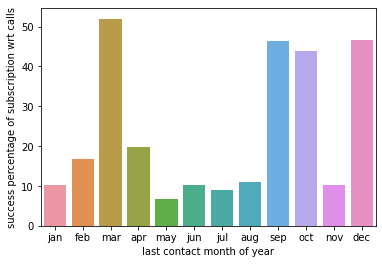

In [247]:
df_mon = pd.DataFrame(df[df['y']=='yes']['month'].value_counts()*100/df['month'].value_counts())
df_mon_new = pd.DataFrame({'month': list(df_mon.index),'Percentage':df_mon['month']})
sns.barplot(y='Percentage', x='month',data=df_mon_new,order=mon_list)
plt.ylabel('success percentage of subscription wrt calls')
plt.xlabel('last contact month of year')

We can say that a lot of disparity is there in number of calls done every month. Campaign was not uniform across whole year.\
Also it can be said that the months, where least number of calls have been done, have approx 50% success rate of subscription.The customers who were contacted in the months - March, December, September and October have higher chances of subscription than the customers who were contacted on the other months.

#### Duration

Text(0.5, 0, 'has the client subscribed a term deposit?')

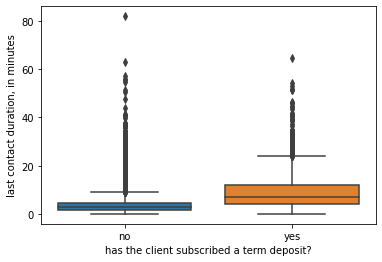

In [248]:
sns.boxplot(y=df['duration']/60, x=df['y'])
plt.ylabel('last contact duration, in minutes')
plt.xlabel('has the client subscribed a term deposit?')

In [249]:
len(df[(df['duration']>=600) & (df['y']=='yes')]['duration'])*100/len(df[df['duration']>=600]['duration'])

48.31667543398211

Customers , whose call duration is more than or equal to 10 minutes, are more likely to subscribe(almost 50%).\
The plot shows call duration is directly proportional to subscription.

#### Campaign

Text(0.5, 0, 'has the client subscribed a term deposit?')

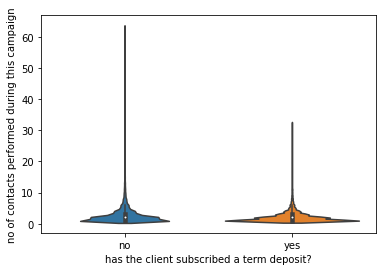

In [250]:
sns.violinplot(y=df['campaign'], x=df['y'])
plt.ylabel('no of contacts performed during this campaign')
plt.xlabel('has the client subscribed a term deposit?')

In [251]:
len(df[(df['campaign']>=3) & (df['y']=='yes')]['campaign'])*100/len(df[df['duration']>=3]['duration'])

2.9356458642125522

It shows, more the number of call, less is the chance of subscription. Customers who have been contacted 3 or more times , have subscription percentage as 3%(approximately) only.

campaign seems inversely propotional to duration. lets plot and check it.

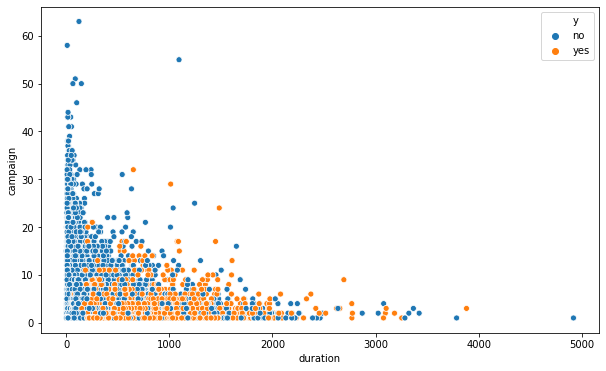

In [252]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['duration'], y=df['campaign'],hue=df['y'])

As per expectation, the above plot is representing the same. More the duration and less the no of calls, more is the chance of subscription.

#### poutcome

In [253]:
df[df['y']=='yes']['poutcome'].value_counts()

unknown    3386
success     978
failure     618
other       307
Name: poutcome, dtype: int64

In [254]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

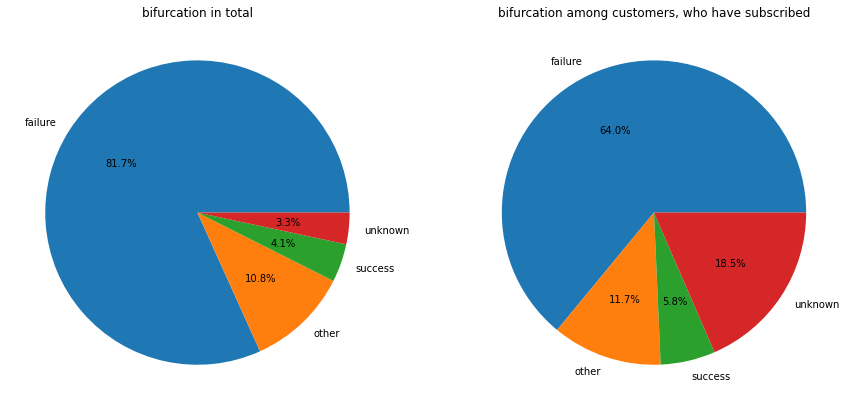

In [255]:
gr_in_total= df['poutcome'].value_counts()
gr_in_subscribed = df[df['y']=='yes']['poutcome'].value_counts()
grouped = pd.concat([gr_in_total,gr_in_subscribed], axis=1)
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.pie(grouped.iloc[:,0], labels = ['failure','other','success','unknown'],autopct='%1.1f%%')
plt.title('bifurcation in total')
plt.subplot(1,2,2)
plt.pie(grouped.iloc[:,1], labels = ['failure','other','success','unknown'],autopct='%1.1f%%')
plt.title('bifurcation among customers, who have subscribed')
plt.show()

Text(0, 0.5, 'success percentage of subscription wrt calls')

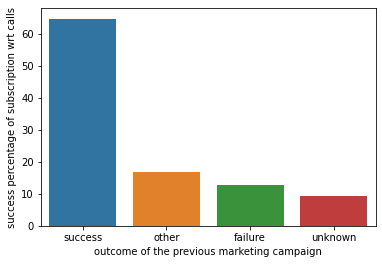

In [256]:
df_poutcome = pd.DataFrame(df[df['y']=='yes']['poutcome'].value_counts()*100/df['poutcome'].value_counts())
df_poutcome_new = pd.DataFrame({'poutcome': list(df_poutcome.index),'Percentage':df_poutcome['poutcome']})
sns.barplot(y='Percentage', x='poutcome',data=df_poutcome_new,order=df_poutcome['poutcome'].sort_values(ascending=False).index)
plt.xlabel('outcome of the previous marketing campaign')
plt.ylabel('success percentage of subscription wrt calls')

Here, we can say that those who had subscribed in the last campaign are more likely to subscribe in this campaign.

### Feature Selection and Missing Value Imputation

In [257]:
df_enc = df.copy()
#df_enc = df_enc.replace({'yes':0,'no':1})
df_enc['y'] = df_enc['y'].replace({'yes':0,'no':1})

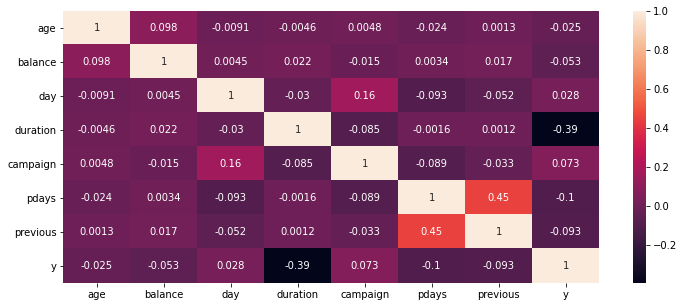

In [258]:
plt.figure(figsize=(12,5))
sns.heatmap(df_enc.corr(), annot=True)

As per the heatmap, pdays and previous is showing moderate correlation. Also these two columns are not having significant impact on 'y' and their purpose is solved by poutcome column.Also 'age' and 'day' column have the least correlation with y.

In [259]:
#Converting values in 'poutcome' where values are unknown and pdays values are -1
df.loc[(df.poutcome=='unknown') & (df.pdays==-1),'poutcome'] = 'Not_Contacted'
df['poutcome'].value_counts()

Not_Contacted    36954
failure           4901
other             1840
success           1511
unknown              5
Name: poutcome, dtype: int64

In [260]:
df1 = df.drop(columns=['pdays','previous','age_group'], axis=1)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,Not_Contacted,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,Not_Contacted,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,Not_Contacted,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,Not_Contacted,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,Not_Contacted,no


In [261]:
#Converting all records with 'unknown' as NaN values
df1.replace('unknown',np.NaN, inplace=True)
df1['duration'] = df1['duration'].replace(0, np.NaN) 
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261.0,1,Not_Contacted,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151.0,1,Not_Contacted,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76.0,1,Not_Contacted,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92.0,1,Not_Contacted,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198.0,1,Not_Contacted,no


In [262]:
df1.isnull().sum()[df1.isnull().sum()>0]

job            288
education     1857
contact      13020
duration         3
poutcome         5
dtype: int64

In [263]:
#Label encoding all the categroical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['marital'] = le.fit_transform(df1['marital'])
df1['default'] = le.fit_transform(df1['default'])
df1['housing'] = le.fit_transform(df1['housing'])
df1['loan'] = le.fit_transform(df1['loan'])
df1['month'] = le.fit_transform(df1['month'])
df1['y'] = le.fit_transform(df1['y'])

In [264]:
obj = ['job','education','contact','poutcome']
for i in obj:
    df1[i] = df1[i].fillna('zzz')
    df1[i] = le.fit_transform(df1[i])
    df1[i] = df1[i].replace(list(df1[i].sort_values(ascending=False))[0], np.NaN)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,4.0,1,2.0,0,2143,1,0,NaN,5,8,261.0,1,0.0,0
1,44,9.0,2,1.0,0,29,1,0,NaN,5,8,151.0,1,0.0,0
2,33,2.0,1,1.0,0,2,1,1,NaN,5,8,76.0,1,0.0,0
3,47,1.0,1,NaN,0,1506,1,0,NaN,5,8,92.0,1,0.0,0
4,33,NaN,2,NaN,0,1,0,0,NaN,5,8,198.0,1,0.0,0


In [265]:
df1.isnull().sum()[df1.isnull().sum()>0]

job            288
education     1857
contact      13020
duration         3
poutcome         5
dtype: int64

#### Now we are left with 4 continuous features and all 4 are having outliers as we saw above in boxplot

#### So lets convert outliers as NaN values and then apply MICE imputation for all null values in the data set

In [266]:
#Finding values of Upper and Lower Whiskers of the boxplots of each numerical variable and converting outliers to NaN values
cols = ['age','balance','duration','campaign']
for i in cols:
    iqr = df1[i].quantile(q=0.75) - df1[i].quantile(q=0.25)
    ul = df1[i].quantile(q=0.75) + 1.5*iqr
    ll = df1[i].quantile(q=0.25) - 1.5*iqr
    print('upper limit for ',i,': ',ul)
    print('lower limit for ',i,': ',ll)
    print('IQR value for ',i,': ',iqr)
    df1.loc[df1[i] > ul,i] = np.NaN
    df1.loc[df1[i] < ll,i] = np.NaN
df1.head()

upper limit for  age :  70.5
lower limit for  age :  10.5
IQR value for  age :  15.0
upper limit for  balance :  3462.0
lower limit for  balance :  -1962.0
IQR value for  balance :  1356.0
upper limit for  duration :  643.0
lower limit for  duration :  -221.0
IQR value for  duration :  216.0
upper limit for  campaign :  6.0
lower limit for  campaign :  -2.0
IQR value for  campaign :  2.0


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58.0,4.0,1,2.0,0,2143.0,1,0,NaN,5,8,261.0,1.0,0.0,0
1,44.0,9.0,2,1.0,0,29.0,1,0,NaN,5,8,151.0,1.0,0.0,0
2,33.0,2.0,1,1.0,0,2.0,1,1,NaN,5,8,76.0,1.0,0.0,0
3,47.0,1.0,1,NaN,0,1506.0,1,0,NaN,5,8,92.0,1.0,0.0,0
4,33.0,NaN,2,NaN,0,1.0,0,0,NaN,5,8,198.0,1.0,0.0,0


In [267]:
df1.isnull().sum()[df1.isnull().sum()>0]

age            487
job            288
education     1857
balance       4729
contact      13020
duration      3238
campaign      3064
poutcome         5
dtype: int64

In [268]:
df2 = df1.drop('y', axis=1)

#### Now Let's apply MICE and impute for all null values

In [269]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [270]:
mice_imputer = IterativeImputer(initial_strategy = 'median', imputation_order = 'random',random_state=3) #'median' is used as initial strategy because there is mix of numerical and categorical variables with null values.

In [271]:
df2.iloc[:, :] = np.round(mice_imputer.fit_transform(df2)) #the output is in decimals, thus, rounding off the values to obtain 0's and 1's for categorical variables.

In [272]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,58.0,4.0,1.0,2.0,0.0,2143.0,1.0,0.0,0.0,5.0,8.0,261.0,1.0,0.0
1,44.0,9.0,2.0,1.0,0.0,29.0,1.0,0.0,0.0,5.0,8.0,151.0,1.0,0.0
2,33.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,5.0,8.0,76.0,1.0,0.0
3,47.0,1.0,1.0,1.0,0.0,1506.0,1.0,0.0,0.0,5.0,8.0,92.0,1.0,0.0
4,33.0,5.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,8.0,198.0,1.0,0.0


In [273]:
#Checking if imputation was successful
df2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
poutcome     0
dtype: int64

In [274]:
num_cols_na = ['age','balance', 'day', 'duration', 'campaign']

#### Verifying the skewness after mice imputation

In [275]:
for i in num_cols_na:
    print("\n\nFeature : ",i)
    print("Skewness in original dataset : ", df[i].skew())
    print("Skewness in mice imputed dataset with outliers as na : ", df2[i].skew())



Feature :  age
Skewness in original dataset :  0.6848179257252598
Skewness in mice imputed dataset with outliers as na :  0.4001931253761543


Feature :  balance
Skewness in original dataset :  8.360308326166326
Skewness in mice imputed dataset with outliers as na :  1.3290868631921382


Feature :  day
Skewness in original dataset :  0.09307901402122411
Skewness in mice imputed dataset with outliers as na :  0.09307901402122411


Feature :  duration
Skewness in original dataset :  3.144318099423456
Skewness in mice imputed dataset with outliers as na :  1.0515454358854113


Feature :  campaign
Skewness in original dataset :  4.898650166179674
Skewness in mice imputed dataset with outliers as na :  1.2349327488653978


In [276]:
# Joining the mice imputed dataset and y to form a complete dataset
df3 = pd.concat([df2,df1['y']], axis=1)
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58.0,4.0,1.0,2.0,0.0,2143.0,1.0,0.0,0.0,5.0,8.0,261.0,1.0,0.0,0
1,44.0,9.0,2.0,1.0,0.0,29.0,1.0,0.0,0.0,5.0,8.0,151.0,1.0,0.0,0
2,33.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,5.0,8.0,76.0,1.0,0.0,0
3,47.0,1.0,1.0,1.0,0.0,1506.0,1.0,0.0,0.0,5.0,8.0,92.0,1.0,0.0,0
4,33.0,5.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,8.0,198.0,1.0,0.0,0


In [277]:
df3 = df3.astype('int')
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,0,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,0,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,0,0
3,47,1,1,1,0,1506,1,0,0,5,8,92,1,0,0
4,33,5,2,1,0,1,0,0,0,5,8,198,1,0,0


In [278]:
mice_out_na = df3.copy()

### Checking VIF for all variables

In [279]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [280]:
#Checking presence of Multicollinearity with Variance Inflation Factor
X_vif=pd.concat([df3.drop('y',axis=1),df[['previous','pdays']]],axis=1)

In [281]:
X_vif.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,previous,pdays
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,0,0,-1
1,44,9,2,1,0,29,1,0,0,5,8,151,1,0,0,-1
2,33,2,1,1,0,2,1,1,0,5,8,76,1,0,0,-1
3,47,1,1,1,0,1506,1,0,0,5,8,92,1,0,0,-1
4,33,5,2,1,0,1,0,0,0,5,8,198,1,0,0,-1


In [282]:
Xc_vif= sm.add_constant(X_vif)
vif_all = pd.DataFrame([vif(Xc_vif.values,i) for i in range(Xc_vif.shape[1])], index= Xc_vif.columns, columns=['VIF'])
vif_all

,VIF
const,59.553180
age,1.307734
job,1.053949
marital,1.227991
education,1.089055
default,1.023586
balance,1.053788
housing,1.174078
loan,1.020848
contact,1.036292


Most of the VIF values are close to 1 indicating no multicollinearity. However, we get higher VIF values for poutcome and pdays(same can be inferred from the correlation plot). Since, poutcome column is deduced from pdays and previous columns, therefore, these two columns will be removed.

### All the initial preparation is done for the data set. Now let's check Multicolinearity and statistical importance of the independent variables over the dependent variables. 

In [283]:
X= df3.drop('y', axis=1)
y= df3['y']

In [284]:
Xc= sm.add_constant(X)
vif_val = pd.DataFrame([vif(Xc.values,i) for i in range(Xc.shape[1])], index= Xc.columns, columns=['VIF'])
vif_val

,VIF
const,59.430729
age,1.307518
job,1.053464
marital,1.227979
education,1.088037
default,1.023543
balance,1.053213
housing,1.142122
loan,1.020667
contact,1.035793


Now, no multicollinearity exists in the data set as VIF values are very close to 1.

Lets check the summary of Logit Regression

In [285]:
model= sm.Logit(y,Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.300406
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45196
Method:                           MLE   Df Model:                           14
Date:                Tue, 28 Jul 2020   Pseudo R-squ.:                  0.1676
Time:                        09:10:53   Log-Likelihood:                -13582.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1049      0.123    -25.144      0.000      -3.347      -2.863
age           -0.0028      0.002     -1.569      0.117      -0.006       0.001
job            0.0134      0.005      2.621      0.009       0.003       0.024
marital        0.1151      0.029      3.906      0.000       0.057       0.173
education      0.2228      0.026      8.672      0.000       0.172       0.273
default       -0.1517      0.150     -1.012      0.311      -0.446       0.142
balance        0.0002    1.9e-05     10.229      0.000       0.000       0.000
housing       -0.8666      0.034    -25.355      0.000      -0.934      -0.800
loan          -0.4845      0.052     -9.233      0.000      -0.587      -0.382
contact        0.1513      0.064      2.371      0.018       0.026       0.276
day           -0.0036      0.002     -1.900      0.057      -0.007       0.000
month         -0.0043      0.005     -0.825      0.410      -0.014       0.006
duration       0.0045      0.000     43.194      0.000       0.004       0.005
campaign      -0.1201      0.014     -8.568      0.000      -0.148      -0.093
poutcome       0.7117      0.017     41.871      0.000       0.678       0.745
==============================================================================
"""

In the summary we can see that some features are having p-values more than 0.05. Let's eliminate these by backward elimination method.

In [286]:
#Backward elimination method
cols = list(Xc.columns)

while len(cols)>0:
    X1 = Xc[cols]
    model = sm.Logit(y,X1).fit()
    p = model.pvalues
    max_p = max(p)
    feature_maxp = p.idxmax()
    
    if max_p > 0.05:
        print('feature removed: ',feature_maxp)
        print('p-value of feature: ',max_p)
        cols.remove(feature_maxp)
    else:
        break
        
print('remaining columns: ',cols)

Optimization terminated successfully.
         Current function value: 0.300406
         Iterations 7
feature removed:  month
p-value of feature:  0.40955052995933083
Optimization terminated successfully.
         Current function value: 0.300414
         Iterations 7
feature removed:  default
p-value of feature:  0.30569361407802886
Optimization terminated successfully.
         Current function value: 0.300426
         Iterations 7
feature removed:  age
p-value of feature:  0.11874012577585798
Optimization terminated successfully.
         Current function value: 0.300453
         Iterations 7
feature removed:  day
p-value of feature:  0.057201164566799655
Optimization terminated successfully.
         Current function value: 0.300493
         Iterations 7
remaining columns:  ['const', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'poutcome']


## **Modelling on Dataset with outliers treated as NA**

In [287]:
cols.remove('const')
X = df3[cols]

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3, stratify= y)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((31647, 10), (13564, 10), (31647,), (13564,))

### **Logistic Regression**

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix, classification_report,roc_curve,precision_recall_curve, f1_score,precision_score,recall_score

In [290]:
#Running Logistic Regression on Train Data
lr= LogisticRegression(random_state=3, solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Train Evaluation Results
Overall accuracy:  0.8932916232186305
Roc_auc_score:  0.7769706673765584
Confusion_matrix:
 [[27623   322]
 [ 3055   647]]
Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     27945
           1       0.67      0.17      0.28      3702

    accuracy                           0.89     31647
   macro avg       0.78      0.58      0.61     31647
weighted avg       0.87      0.89      0.86     31647



Text(0, 0.5, 'TPR')

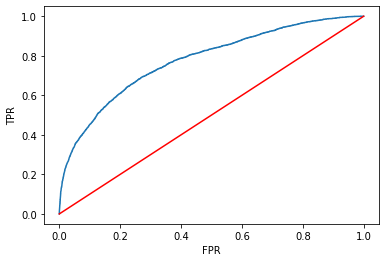

In [291]:
#Predicting y from the train data
y_pred_train = lr.predict(X_train)
y_pred_prob_train= lr.predict_proba(X_train)[:,1]
print("Train Evaluation Results")
print('Overall accuracy: ',accuracy_score(y_train,y_pred_train))
print('Roc_auc_score: ',roc_auc_score(y_train,y_pred_prob_train))
print('Confusion_matrix:\n',confusion_matrix(y_train,y_pred_train))
print('Classification_report:\n',classification_report(y_train,y_pred_train))
fpr, tpr, thresholds=roc_curve(y_train,y_pred_prob_train)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

Test Evaluation Results
Overall accuracy:  0.8902241226776763
Roc_auc_score:  0.7651117067006028
Confusion_matrix:
 [[11812   165]
 [ 1324   263]]
Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.61      0.17      0.26      1587

    accuracy                           0.89     13564
   macro avg       0.76      0.58      0.60     13564
weighted avg       0.87      0.89      0.86     13564



Text(0, 0.5, 'TPR')

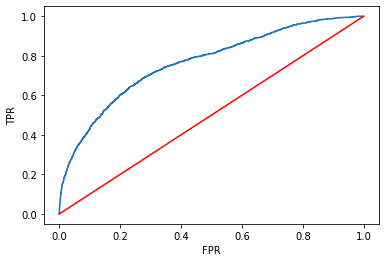

In [292]:
y_pred_test = lr.predict(X_test)
y_pred_prob_test = lr.predict_proba(X_test)[:,1]
print("Test Evaluation Results")
print('Overall accuracy: ',accuracy_score(y_test,y_pred_test))
print('Roc_auc_score: ',roc_auc_score(y_test,y_pred_prob_test))
print('Confusion_matrix:\n',confusion_matrix(y_test,y_pred_test))
print('Classification_report:\n',classification_report(y_test,y_pred_test))
fpr, tpr, thresholds=roc_curve(y_test,y_pred_prob_test)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

Here, we can see that overall accuracy is high but precision and recall values are very low. So let's check out the distribution of probabilities for both the classes of the target variable.

In [293]:
prob = pd.DataFrame({'prob':y_pred_prob_test}, index= X_test.index)
prob['y_est'] = y_pred_test
prob['y_act'] = y_test
prob.head()

,prob,y_est,y_act
7264,0.036026,0,0
37353,0.109727,0,0
25011,0.332916,0,0
21748,0.043634,0,0
42344,0.060392,0,0


In [294]:
df0= prob[prob['y_act']==0]
df1= prob[prob['y_act']==1]

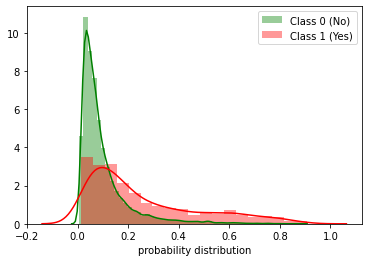

In [295]:
sns.distplot(df0['prob'], color='g')
sns.distplot(df1['prob'], color='r')
plt.xlabel('probability distribution')
plt.legend(labels=['Class 0 (No)','Class 1 (Yes)'])
plt.show()

By looking at this plot, we can say that a threshold of 0.5 will definitely give poor recall and precision value because most of the class 1 ('subscribe') probabilities are less than 0.5. So we need to shift the threshold towards zero.

**Changing the thresholds to improve the recall score**

Youden's index is often used in conjunction with Receiver Operating Characteristic (ROC) analysis. Youden's index is defined for all points of an ROC curve, and the maximum value of the index may be used as a criterion for selecting the optimum cut-off point when a diagnostic test gives a numeric rather than a dichotomous result. 

Formula for J-Statistic

**J = Sensitivity + Specificity – 1**

This formula can be re-written as

**J = TPR + (1 - FPR) -1 = TPR-FPR**

Best Threshold=0.122987


Text(0, 0.5, 'TPR')

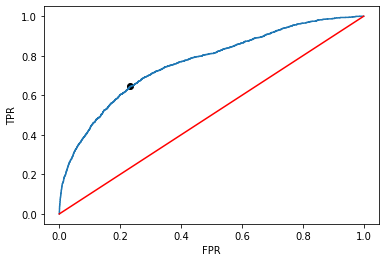

In [296]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_pred_prob_test)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [297]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (lr.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[0 0 1 ... 0 0 1]


In [298]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[9196 2781]
 [ 564 1023]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.94      0.77      0.85     11977
           1       0.27      0.64      0.38      1587

    accuracy                           0.75     13564
   macro avg       0.61      0.71      0.61     13564
weighted avg       0.86      0.75      0.79     13564

F1 score - Test :  0.3795214245965498
Overall Accuracy - Test :  0.7533913299911531


### **Decision Tree**

In [299]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint,uniform as sp_uniform

In [300]:
dtc= DecisionTreeClassifier(random_state=3)


params = {
          'max_features' : sp_randint(1,10),
          'max_depth' : sp_randint(2,20),
          'min_samples_split' :sp_randint(2,25),
          'min_samples_leaf' :  sp_randint(2,25),
          'criterion' : ['gini','entropy']}

rsearch = RandomizedSearchCV(dtc,param_distributions=params,n_iter=200,cv=3,scoring='roc_auc',n_jobs=-1,random_state=3)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=3,
             

In [301]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 8,
 'min_samples_leaf': 21,
 'min_samples_split': 16}

In [302]:
dt=DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)
y_train_pred=dt.predict(X_train)
#y_train_prob = dt.predict_proba(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))

Confusion Matrix - Train :  
 [[27722   223]
 [ 3047   655]]
Overall Accuracy - Train :  0.8966726703952981
AUC - Train :  0.8209147608866262
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     27945
           1       0.75      0.18      0.29      3702

    accuracy                           0.90     31647
   macro avg       0.82      0.58      0.62     31647
weighted avg       0.88      0.90      0.87     31647



Confusion Matrix - Test :  
 [[11862   115]
 [ 1326   261]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.69      0.16      0.27      1587

    accuracy                           0.89     13564
   macro avg       0.80      0.58      0.60     13564
weighted avg       0.88      0.89      0.86     13564

F1 score - Test :  0.2659195109526235
Overall Accuracy - Test :  0.8937629017988794
AUC - Test :  0.8021422229194908


Text(0, 0.5, 'TPR')

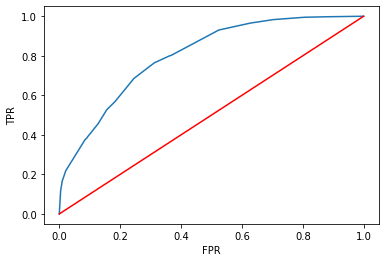

In [303]:
y_test_pred=dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**Changing the thresholds to improve the recall score**

Best Threshold=0.120000


Text(0, 0.5, 'TPR')

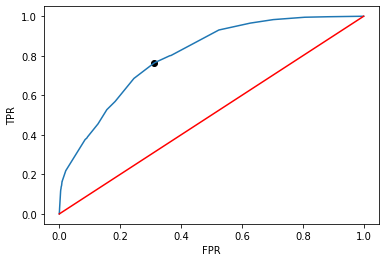

In [304]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [305]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (dt.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[0 0 1 ... 0 0 1]


In [306]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[8237 3740]
 [ 374 1213]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     11977
           1       0.24      0.76      0.37      1587

    accuracy                           0.70     13564
   macro avg       0.60      0.73      0.59     13564
weighted avg       0.87      0.70      0.75     13564

F1 score - Test :  0.3709480122324159
Overall Accuracy - Test :  0.6966971394868771


### **Random Forest Results**

In [307]:
from sklearn.ensemble import RandomForestClassifier

In [308]:
rfc= RandomForestClassifier(random_state=3)


params = {'n_estimators' : sp_randint(50,150),
          'max_features' : sp_randint(1,10),
          'max_depth' : sp_randint(2,20),
          'min_samples_split' :sp_randint(2,25),
          'min_samples_leaf' :  sp_randint(2,25),
          'criterion' : ['gini','entropy']}

rsearch = RandomizedSearchCV(rfc,param_distributions=params,n_iter=100,cv=3,scoring='roc_auc',n_jobs=-1,random_state=3)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [309]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'max_features': 5,
 'min_samples_leaf': 19,
 'min_samples_split': 23,
 'n_estimators': 106}

In [310]:
rf=RandomForestClassifier(**rsearch.best_params_)
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
#y_train_prob = dt.predict_proba(X_train)
y_train_prob = rf.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))

Confusion Matrix - Train :  
 [[27703   242]
 [ 2928   774]]
Overall Accuracy - Train :  0.8998325275697538
AUC - Train :  0.9147516698260911
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.95     27945
           1       0.76      0.21      0.33      3702

    accuracy                           0.90     31647
   macro avg       0.83      0.60      0.64     31647
weighted avg       0.89      0.90      0.87     31647



Confusion Matrix - Test :  
 [[11848   129]
 [ 1314   273]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.68      0.17      0.27      1587

    accuracy                           0.89     13564
   macro avg       0.79      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564

F1 score - Test :  0.27450980392156865
Overall Accuracy - Test :  0.8936154526688292
AUC - Test :  0.849098216446046


Text(0, 0.5, 'TPR')

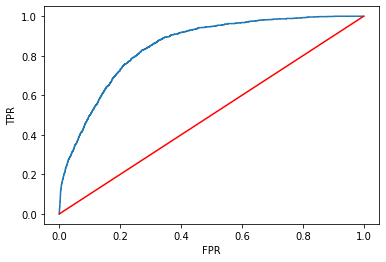

In [311]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**Changing the thresholds to improve the recall score**

Best Threshold=0.124000


Text(0, 0.5, 'TPR')

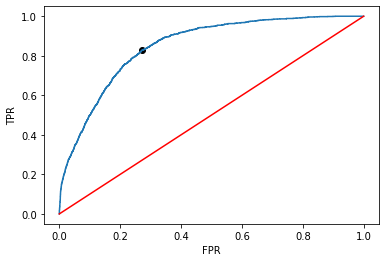

In [312]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [313]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (rf.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[0 0 1 ... 0 0 1]


In [314]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[8731 3246]
 [ 276 1311]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.73      0.83     11977
           1       0.29      0.83      0.43      1587

    accuracy                           0.74     13564
   macro avg       0.63      0.78      0.63     13564
weighted avg       0.89      0.74      0.78     13564

F1 score - Test :  0.4267578125
Overall Accuracy - Test :  0.7403420819817164


### **KNN Results**

In [760]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
Xs=ss.fit_transform(X)

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [761]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params={'n_neighbors' : [195,197,199,201,203],'p' : [1,2]}

gsearch_knn = GridSearchCV(knn, param_grid=params, cv =3,n_jobs=-1,scoring='roc_auc')

gsearch_knn.fit(Xs,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [195, 197, 199, 201, 203], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [762]:
gsearch_knn.best_params_

{'n_neighbors': 203, 'p': 2}

In [763]:
knn = KNeighborsClassifier(**gsearch_knn.best_params_)

Confusion Matrix - Train :  
 [[27729   224]
 [ 3160   534]]
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     27953
           1       0.70      0.14      0.24      3694

    accuracy                           0.89     31647
   macro avg       0.80      0.57      0.59     31647
weighted avg       0.88      0.89      0.86     31647

Overall Accuracy - Train :  0.8930704332164187
AUC - Train :  0.8032292041918689


Confusion Matrix - Test :  
 [[11889    80]
 [ 1353   242]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.75      0.15      0.25      1595

    accuracy                           0.89     13564
   macro avg       0.82      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564

Overall Accuracy - Test :  0.8943526983190799
F1 score - Test :  0.252477

Text(0, 0.5, 'TPR')

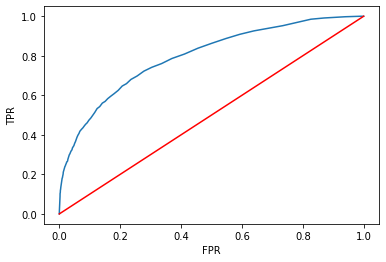

In [764]:
knn.fit(X_trains,y_train)
y_train_pred=knn.predict(X_trains)
#y_train_prob = lr.predict_proba(X_train)
y_train_prob = knn.predict_proba(X_trains)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print("\n")
y_test_pred=knn.predict(X_tests)
y_test_prob = knn.predict_proba(X_tests)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('F1 score - Test : ' , f1_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**Changing the thresholds to improve the recall score**

Best Threshold=0.113000


Text(0, 0.5, 'TPR')

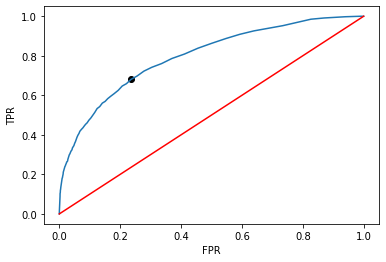

In [768]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [769]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (knn.predict_proba(X_tests)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[0 0 0 ... 0 0 0]


In [770]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[9152 2817]
 [ 510 1085]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.95      0.76      0.85     11969
           1       0.28      0.68      0.39      1595

    accuracy                           0.75     13564
   macro avg       0.61      0.72      0.62     13564
weighted avg       0.87      0.75      0.79     13564

F1 score - Test :  0.3947607786065127
Overall Accuracy - Test :  0.7547183721616042


### **Ada Boost**

In [128]:
from sklearn.ensemble import AdaBoostClassifier

In [326]:
ada = AdaBoostClassifier(random_state=3)
ada.fit(X_train,y_train)
y_train_pred=ada.predict(X_train)
#y_train_prob = dt.predict_proba(X_train)
y_train_prob = ada.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))


Confusion Matrix - Train :  
 [[27582   363]
 [ 2945   757]]
Overall Accuracy - Train :  0.8954719246690049
AUC - Train :  0.8482355796709965
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     27945
           1       0.68      0.20      0.31      3702

    accuracy                           0.90     31647
   macro avg       0.79      0.60      0.63     31647
weighted avg       0.88      0.90      0.87     31647



Confusion Matrix - Test :  
 [[11809   168]
 [ 1279   308]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.65      0.19      0.30      1587

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

F1 score - Test :  0.2985942801745031
Overall Accuracy - Test :  0.893320554408729
AUC - Test :  0.8365287037500304


Text(0, 0.5, 'TPR')

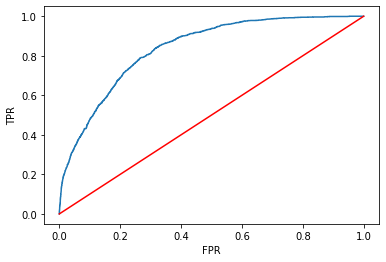

In [327]:
y_test_pred=ada.predict(X_test)
y_test_prob = ada.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**Changing the thresholds to improve the recall score**

Best Threshold=0.490000


Text(0, 0.5, 'TPR')

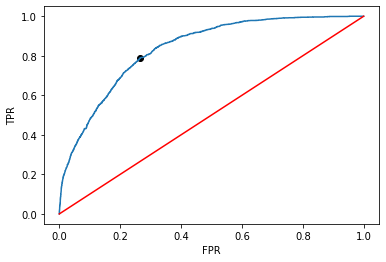

In [328]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [329]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (ada.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[0 0 1 ... 0 0 1]


In [330]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[8883 3094]
 [ 354 1233]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.74      0.84     11977
           1       0.28      0.78      0.42      1587

    accuracy                           0.75     13564
   macro avg       0.62      0.76      0.63     13564
weighted avg       0.88      0.75      0.79     13564

F1 score - Test :  0.4169766655393981
Overall Accuracy - Test :  0.7457976997935712


### **Light GBM Results**

In [331]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=3)

In [332]:
params = { 'n_estimators' : sp_randint(50,200),
        'max_depth' : sp_randint(2,15),
         'learning_rate' : sp_uniform(0.201,0.5),
         'num_leaves' : sp_randint(20,50)}

rsearch = RandomizedSearchCV(lgbm, param_distributions=params, cv=3, n_iter=200, n_jobs=-1, random_state=3)
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=3, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f47e73f14e

In [333]:
rsearch.best_params_

{'learning_rate': 0.3254708863549051,
 'max_depth': 2,
 'n_estimators': 55,
 'num_leaves': 42}

In [334]:
lgbm = lgb.LGBMClassifier(**rsearch.best_params_)

In [335]:
lgbm.fit(X_train,y_train)
y_train_pred=lgbm.predict(X_train)
#y_train_prob = dt.predict_proba(X_train)
y_train_prob = lgbm.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))


Confusion Matrix - Train :  
 [[27664   281]
 [ 2977   725]]
Overall Accuracy - Train :  0.8970518532562328
AUC - Train :  0.8566572604074203
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     27945
           1       0.72      0.20      0.31      3702

    accuracy                           0.90     31647
   macro avg       0.81      0.59      0.63     31647
weighted avg       0.88      0.90      0.87     31647



Confusion Matrix - Test :  
 [[11832   145]
 [ 1307   280]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.66      0.18      0.28      1587

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564

F1 score - Test :  0.2783300198807157
Overall Accuracy - Test :  0.8929519315836036
AUC - Test :  0.8429093433070811


Text(0, 0.5, 'TPR')

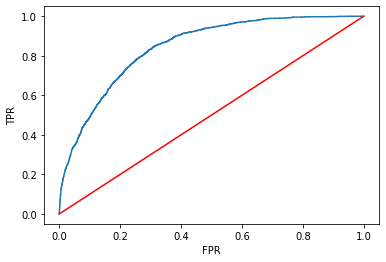

In [336]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**Changing the thresholds to improve the recall score**

Best Threshold=0.101000


Text(0, 0.5, 'TPR')

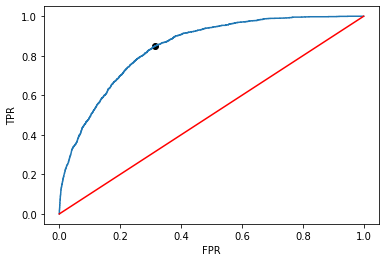

In [340]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [341]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (lgbm.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[0 1 1 ... 0 0 1]


In [342]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[8207 3770]
 [ 238 1349]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.69      0.80     11977
           1       0.26      0.85      0.40      1587

    accuracy                           0.70     13564
   macro avg       0.62      0.77      0.60     13564
weighted avg       0.89      0.70      0.76     13564

F1 score - Test :  0.40232627497763196
Overall Accuracy - Test :  0.704511943379534


## **Changing the estimator in MICE imputation to ExtraTreesRegressor**

As we have outliers in our data, a tree based imputation will be more accurate in mice imputation

In [343]:
df = pd.read_excel(io.BytesIO(uploaded['bank-full - Copy.xlsx']))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [344]:
df.loc[(df.poutcome=='unknown') & (df.pdays==-1),'poutcome'] = 'Not_Contacted'
df['poutcome'].value_counts()

Not_Contacted    36954
failure           4901
other             1840
success           1511
unknown              5
Name: poutcome, dtype: int64

In [345]:
df1 = df.drop(columns=['pdays','previous'], axis=1)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,Not_Contacted,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,Not_Contacted,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,Not_Contacted,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,Not_Contacted,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,Not_Contacted,no


In [346]:
df1.replace('unknown',np.NaN, inplace=True)
df1['duration'] = df1['duration'].replace(0, np.NaN) 
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261.0,1,Not_Contacted,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151.0,1,Not_Contacted,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76.0,1,Not_Contacted,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92.0,1,Not_Contacted,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198.0,1,Not_Contacted,no


In [347]:
df1.isnull().sum()[df1.isnull().sum()>0]

job            288
education     1857
contact      13020
duration         3
poutcome         5
dtype: int64

In [348]:
df1.shape

(45211, 15)

In [349]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['marital'] = le.fit_transform(df1['marital'])
df1['default'] = le.fit_transform(df1['default'])
df1['housing'] = le.fit_transform(df1['housing'])
df1['loan'] = le.fit_transform(df1['loan'])
df1['month'] = le.fit_transform(df1['month'])
df1['y'] = le.fit_transform(df1['y'])

In [350]:
obj = ['job','education','contact','poutcome']
for i in obj:
    df1[i] = df1[i].fillna('zzz')
    df1[i] = le.fit_transform(df1[i])
    df1[i] = df1[i].replace(list(df1[i].sort_values(ascending=False))[0], np.NaN)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,4.0,1,2.0,0,2143,1,0,NaN,5,8,261.0,1,0.0,0
1,44,9.0,2,1.0,0,29,1,0,NaN,5,8,151.0,1,0.0,0
2,33,2.0,1,1.0,0,2,1,1,NaN,5,8,76.0,1,0.0,0
3,47,1.0,1,NaN,0,1506,1,0,NaN,5,8,92.0,1,0.0,0
4,33,NaN,2,NaN,0,1,0,0,NaN,5,8,198.0,1,0.0,0


In [440]:
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
br_est = BayesianRidge()
dtr_est = DecisionTreeRegressor(random_state=0)
etr_est = ExtraTreesRegressor(random_state=0)
knn_est = KNeighborsRegressor()
estimators = [br_est,dtr_est,etr_est,knn_est]
initial_strategy = ["mean", "median", "most_frequent"]

In [441]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

#### Checking results of each estimators:

In [442]:
scores = pd.DataFrame()
for i in estimators:
    for j in initial_strategy:
        df2 = df1.drop('y', axis=1)
        it_imputer = IterativeImputer(estimator= i, initial_strategy = j,
                                        imputation_order = 'random',random_state=3)
        df2.iloc[:, :] = np.round(it_imputer.fit_transform(df2))
        df3 = pd.concat([df2,df1['y']], axis=1)
        df3 = df3.astype('int')
        X= df3.drop('y', axis=1)
        y= df3['y']
        Xc= sm.add_constant(X)
        cols = list(Xc.columns)

        while len(cols)>0:
            X1 = Xc[cols]
            model = sm.Logit(y,X1).fit()
            p = model.pvalues
            max_p = max(p)
            feature_maxp = p.idxmax()

            if max_p > 0.05:
                print('feature removed: ',feature_maxp)
                print('p-value of feature: ',max_p)
                cols.remove(feature_maxp)
            else:
                break

        print('remaining columns: ',cols)
        cols.remove('const')
        X = df3[cols]
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3, stratify= y)
        lr= LogisticRegression(random_state=3, solver='liblinear')
        lr.fit(X_train,y_train)
        y_pred_train = lr.predict(X_train)
        y_pred_prob_train= lr.predict_proba(X_train)[:,1]
        y_pred_test = lr.predict(X_test)
        y_pred_prob_test = lr.predict_proba(X_test)[:,1]
        scores = scores.append({'estimator':str(type(i))[16:-2],
                                'initial_strategy':j,
                                'train_acc':accuracy_score(y_train,y_pred_train),
                                'train_auc':roc_auc_score(y_train,y_pred_prob_train),
                                'test_acc':accuracy_score(y_test,y_pred_test),
                                'test_auc':roc_auc_score(y_test,y_pred_prob_test)},ignore_index=True)

Optimization terminated successfully.
         Current function value: 0.259995
         Iterations 8
feature removed:  day
p-value of feature:  0.26883936889105864
Optimization terminated successfully.
         Current function value: 0.260009
         Iterations 8
feature removed:  month
p-value of feature:  0.24897349836337646
Optimization terminated successfully.
         Current function value: 0.260024
         Iterations 8
feature removed:  default
p-value of feature:  0.1838181245706757
Optimization terminated successfully.
         Current function value: 0.260044
         Iterations 8
feature removed:  contact
p-value of feature:  0.08998411540968981
Optimization terminated successfully.
         Current function value: 0.260075
         Iterations 7
feature removed:  job
p-value of feature:  0.053764283449063276
Optimization terminated successfully.
         Current function value: 0.260116
         Iterations 7
remaining columns:  ['const', 'age', 'marital', 'education', 'b

In [443]:
scores

,estimator,initial_strategy,test_acc,test_auc,train_acc,train_auc
0,linear_model._bayes.BayesianRidge,mean,0.898260,0.871364,0.898505,0.877581
1,linear_model._bayes.BayesianRidge,median,0.898260,0.871308,0.898505,0.877590
2,linear_model._bayes.BayesianRidge,most_frequent,0.898186,0.871347,0.898537,0.877576
3,tree._classes.DecisionTreeRegressor,mean,0.898702,0.870278,0.898537,0.877000
4,tree._classes.DecisionTreeRegressor,median,0.898924,0.870762,0.898505,0.877179
5,tree._classes.DecisionTreeRegressor,most_frequent,0.898850,0.871446,0.898411,0.877414
6,ensemble._forest.ExtraTreesRegressor,mean,0.897597,0.867490,0.898632,0.875655
7,ensemble._forest.ExtraTreesRegressor,median,0.898334,0.868765,0.898727,0.876296
8,ensemble._forest.ExtraTreesRegressor,most_frequent,0.898260,0.870566,0.898727,0.877216
9,neighbors._regression.KNeighborsRegressor,mean,0.898481,0.871309,0.898284,0.877501


**As ExtraTrees estimator is giving best results, proceeding with the same**

In [351]:
from sklearn.ensemble import ExtraTreesRegressor
etr_est = ExtraTreesRegressor(random_state=3)

In [352]:
X = df1.drop('y', axis=1)
y = df1['y']

In [353]:
it_imputer = IterativeImputer(estimator= etr_est,initial_strategy = 'most_frequent',imputation_order ='ascending',
                              random_state=3)
X.iloc[:, :] = np.round(it_imputer.fit_transform(X))
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,58.0,4.0,1.0,2.0,0.0,2143.0,1.0,0.0,0.0,5.0,8.0,261.0,1.0,0.0
1,44.0,9.0,2.0,1.0,0.0,29.0,1.0,0.0,0.0,5.0,8.0,151.0,1.0,0.0
2,33.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,5.0,8.0,76.0,1.0,0.0
3,47.0,1.0,1.0,0.0,0.0,1506.0,1.0,0.0,0.0,5.0,8.0,92.0,1.0,0.0
4,33.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,8.0,198.0,1.0,0.0


In [354]:
df2 = pd.concat([X,y], axis=1)
df2 = df2.astype('int')
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,0,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,0,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,0,0
3,47,1,1,0,0,1506,1,0,0,5,8,92,1,0,0
4,33,3,2,1,0,1,0,0,0,5,8,198,1,0,0


In [355]:
mice_extra_trees=df2.copy()

In [356]:
X = df2.drop('y', axis=1)
y = df2['y']

In [357]:
Xc= sm.add_constant(X)
vif_val = pd.DataFrame([vif(Xc.values,i) for i in range(Xc.shape[1])], index= Xc.columns, columns=['VIF'])
vif_val

,VIF
const,52.219082
age,1.330287
job,1.054061
marital,1.220969
education,1.096192
default,1.012005
balance,1.034148
housing,1.151612
loan,1.018919
contact,1.054230


In [358]:
cols = list(Xc.columns)

while len(cols)>1:
    X1 = Xc[cols]
    model = sm.Logit(y,X1).fit()
    p = model.pvalues
    max_p = max(p)
    feature_maxp = p.idxmax()
    
    if max_p > 0.05:
        print('feature removed: ',feature_maxp)
        print('p-value of feature: ',max_p)
        cols.remove(feature_maxp)
    else:
        break
        
print('remaining columns: ',cols)

Optimization terminated successfully.
         Current function value: 0.260025
         Iterations 8
feature removed:  contact
p-value of feature:  0.3164540513862576
Optimization terminated successfully.
         Current function value: 0.260036
         Iterations 8
feature removed:  day
p-value of feature:  0.2680905973631025
Optimization terminated successfully.
         Current function value: 0.260049
         Iterations 8
feature removed:  month
p-value of feature:  0.238699368918304
Optimization terminated successfully.
         Current function value: 0.260065
         Iterations 8
feature removed:  default
p-value of feature:  0.1741320279801183
Optimization terminated successfully.
         Current function value: 0.260086
         Iterations 8
remaining columns:  ['const', 'age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'duration', 'campaign', 'poutcome']


In [359]:
cols.remove('const')
X = X[cols]

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 3)

In [361]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31647, 10), (13564, 10), (31647,), (13564,))

Data is preprocessed and backward elimination is applied for feature selection. 

No multicollinearity was found.

Hence the data is now ready for classification modelling.

### **Logistic Regression Results**

In [362]:
lr= LogisticRegression(random_state=3,solver='liblinear')

In [363]:
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
#y_train_prob = dt.predict_proba(X_train)
y_train_prob = lr.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))

Confusion Matrix - Train :  
 [[27346   607]
 [ 2649  1045]]
Overall Accuracy - Train :  0.897115050399722
AUC - Train :  0.8754381121331147
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     27953
           1       0.63      0.28      0.39      3694

    accuracy                           0.90     31647
   macro avg       0.77      0.63      0.67     31647
weighted avg       0.88      0.90      0.88     31647



Confusion Matrix - Test :  
 [[11730   239]
 [ 1087   508]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     11969
           1       0.68      0.32      0.43      1595

    accuracy                           0.90     13564
   macro avg       0.80      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564

F1 score - Test :  0.4338172502134927
Overall Accuracy - Test :  0.902241226776762
AUC - Test :  0.8817234491087347


Text(0, 0.5, 'TPR')

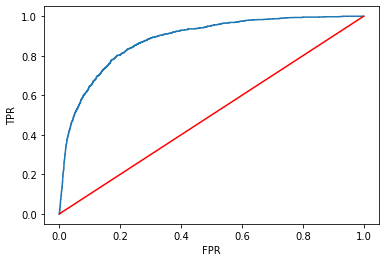

In [364]:
y_test_pred=lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**Changing the thresholds to improve the recall score**

Best Threshold=0.110000


Text(0, 0.5, 'TPR')

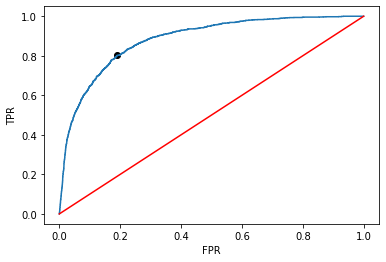

In [365]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [366]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (lr.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[0 0 0 ... 0 0 0]


In [367]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[9680 2289]
 [ 315 1280]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.81      0.88     11969
           1       0.36      0.80      0.50      1595

    accuracy                           0.81     13564
   macro avg       0.66      0.81      0.69     13564
weighted avg       0.90      0.81      0.84     13564

F1 score - Test :  0.4957397366382649
Overall Accuracy - Test :  0.8080212326747273


In [368]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


# evaluate each threshold
scores = [f1_score(y_test, to_labels(y_test_prob, t)) for t in thresholds]

# get best threshold
ix = np.argmax(scores)

best_thresh_f1 = np.round(thresholds[ix],3)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

y_test_pred_newthreshold = to_labels(y_test_prob, thresholds[ix])

Threshold=0.212, F-Score=0.54665


In [369]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))

Confusion Matrix - Test :  
 [[11025   944]
 [  640   955]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     11969
           1       0.50      0.60      0.55      1595

    accuracy                           0.88     13564
   macro avg       0.72      0.76      0.74     13564
weighted avg       0.89      0.88      0.89     13564

F1 score - Test :  0.5466514024041212
Overall Accuracy - Test :  0.8832202890002949


In [370]:
new_range = np.arange(best_thresh,(best_thresh_f1+0.001),0.001)
thres_found = False
for i in new_range:
        
   y_pred_new = to_labels(y_test_prob,i)
   if(precision_score(y_test,y_pred_new)>=0.4) & (recall_score(y_test,y_pred_new)>=0.8):
      print("Moving Thresholds between best recall and f1 score")
      print("Optimal Threshold : ",i)
      print('Classification Report - Test : ','\n' , classification_report(y_test,y_pred_new))
      thres_found = True
        
if(thres_found == False):
      print("No thresholds giving a combination of precision greater than 0.4 and recall greater than 0.8")

No thresholds giving a combination of precision greater than 0.4 and recall greater than 0.8


### **Decision Tree Results**

In [371]:
dtc= DecisionTreeClassifier(random_state=3)


params = {
          'max_features' : sp_randint(1,11),
          'max_depth' : sp_randint(2,20),
          'min_samples_split' :sp_randint(2,25),
          'min_samples_leaf' :  sp_randint(2,25),
          'criterion' : ['gini','entropy']}

rsearch = RandomizedSearchCV(dtc,param_distributions=params,n_iter=200,cv=3,scoring='roc_auc',n_jobs=-1,random_state=3)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=3,
             

In [372]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 9,
 'min_samples_leaf': 16,
 'min_samples_split': 13}

In [373]:
dt=DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)
y_train_pred=dt.predict(X_train)
#y_train_prob = dt.predict_proba(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))

Confusion Matrix - Train :  
 [[27249   704]
 [ 2290  1404]]
Overall Accuracy - Train :  0.9053938761967959
AUC - Train :  0.8960328518415094
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     27953
           1       0.67      0.38      0.48      3694

    accuracy                           0.91     31647
   macro avg       0.79      0.68      0.72     31647
weighted avg       0.89      0.91      0.89     31647



Confusion Matrix - Test :  
 [[11623   346]
 [ 1038   557]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11969
           1       0.62      0.35      0.45      1595

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564

F1 score - Test :  0.44595676541232987
Overall Accuracy - Test :  0.8979652020053082
AUC - Test :  0.875554613262946


Text(0, 0.5, 'TPR')

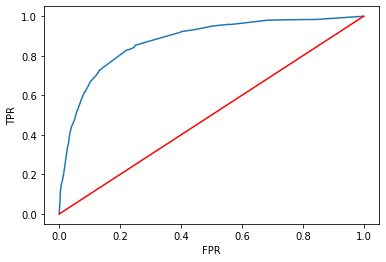

In [374]:
y_test_pred=dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**Changing the thresholds to improve the recall score**

Best Threshold=0.122000


Text(0, 0.5, 'TPR')

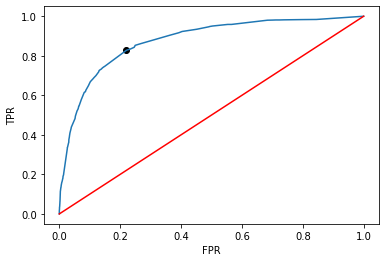

In [375]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [376]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (dt.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[0 0 0 ... 0 0 1]


In [377]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[10195  1774]
 [  406  1189]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.85      0.90     11969
           1       0.40      0.75      0.52      1595

    accuracy                           0.84     13564
   macro avg       0.68      0.80      0.71     13564
weighted avg       0.90      0.84      0.86     13564

F1 score - Test :  0.5217200526546731
Overall Accuracy - Test :  0.8392804482453553


In [378]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


# evaluate each threshold
scores = [f1_score(y_test, to_labels(y_test_prob, t)) for t in thresholds]

# get best threshold
ix = np.argmax(scores)
best_thresh_f1 = np.round(thresholds[ix],3)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

y_test_pred_newthreshold = to_labels(y_test_prob, thresholds[ix])

Threshold=0.311, F-Score=0.55134


In [379]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))

Confusion Matrix - Test :  
 [[10989   980]
 [  615   980]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     11969
           1       0.50      0.61      0.55      1595

    accuracy                           0.88     13564
   macro avg       0.72      0.77      0.74     13564
weighted avg       0.89      0.88      0.89     13564

F1 score - Test :  0.5513361462728551
Overall Accuracy - Test :  0.8824093187850192


In [380]:
new_range = np.arange(best_thresh,(best_thresh_f1+0.001),0.001)
thres_found = False
for i in new_range:
        
   y_pred_new = to_labels(y_test_prob,i)
   if(precision_score(y_test,y_pred_new)>=0.4) & (recall_score(y_test,y_pred_new)>=0.8):
      print("Moving Thresholds between best recall and f1 score")
      print("Optimal Threshold : ",i)
      print('Classification Report - Test : ','\n' , classification_report(y_test,y_pred_new))
      thres_found = True
        
if(thres_found == False):
      print("No thresholds giving a combination of precision greater than 0.4 and recall greater than 0.8")

No thresholds giving a combination of precision greater than 0.4 and recall greater than 0.8


### **Random Forest Results**

In [381]:
rfc= RandomForestClassifier(  random_state=3)


params = {'n_estimators' : sp_randint(50,150),
          'max_features' : sp_randint(1,11),
          'max_depth' : sp_randint(2,20),
          'min_samples_split' :sp_randint(2,25),
          'min_samples_leaf' :  sp_randint(2,25),
          'criterion' : ['gini','entropy']}

rsearch = RandomizedSearchCV(rfc,param_distributions=params,n_iter=100,cv=3,scoring='roc_auc',n_jobs=-1,random_state=3)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [382]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 5,
 'min_samples_leaf': 24,
 'min_samples_split': 2,
 'n_estimators': 114}

In [383]:
rf=RandomForestClassifier(**rsearch.best_params_)
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
#y_train_prob = dt.predict_proba(X_train)
y_train_prob = rf.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))

Confusion Matrix - Train :  
 [[27330   623]
 [ 2174  1520]]
Overall Accuracy - Train :  0.9116187948304737
AUC - Train :  0.9331875740605735
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     27953
           1       0.71      0.41      0.52      3694

    accuracy                           0.91     31647
   macro avg       0.82      0.69      0.74     31647
weighted avg       0.90      0.91      0.90     31647



Confusion Matrix - Test :  
 [[11656   313]
 [  996   599]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.66      0.38      0.48      1595

    accuracy                           0.90     13564
   macro avg       0.79      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564

F1 score - Test :  0.4778619864379737
Overall Accuracy - Test :  0.9034945443821881
AUC - Test :  0.8978985681663002


Text(0, 0.5, 'TPR')

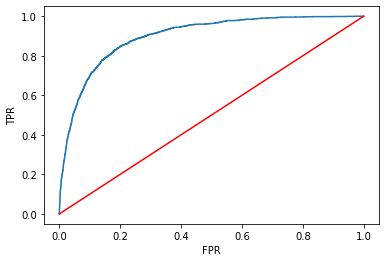

In [384]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**Changing the thresholds to improve the recall score**

Best Threshold=0.122000


Text(0, 0.5, 'TPR')

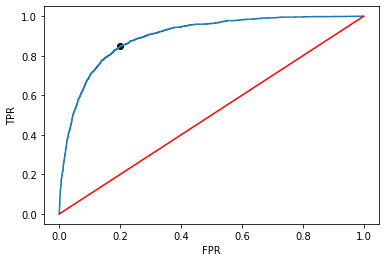

In [385]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [386]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (rf.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[0 0 0 ... 0 0 1]


In [387]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[9574 2395]
 [ 244 1351]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.98      0.80      0.88     11969
           1       0.36      0.85      0.51      1595

    accuracy                           0.81     13564
   macro avg       0.67      0.82      0.69     13564
weighted avg       0.90      0.81      0.84     13564

F1 score - Test :  0.5058977719528178
Overall Accuracy - Test :  0.8054408728988499


In [388]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


# evaluate each threshold
scores = [f1_score(y_test, to_labels(y_test_prob, t)) for t in thresholds]

# get best threshold
ix = np.argmax(scores)
best_thresh_f1 = np.round(thresholds[ix],3)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

y_test_pred_newthreshold = to_labels(y_test_prob, thresholds[ix])

Threshold=0.269, F-Score=0.57326


In [389]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))

Confusion Matrix - Test :  
 [[10896  1073]
 [  523  1072]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     11969
           1       0.50      0.67      0.57      1595

    accuracy                           0.88     13564
   macro avg       0.73      0.79      0.75     13564
weighted avg       0.90      0.88      0.89     13564

F1 score - Test :  0.5732620320855615
Overall Accuracy - Test :  0.8823355942199941


In [390]:
new_range = np.arange(best_thresh,(best_thresh_f1+0.001),0.001)
thres_found = False
for i in new_range:
        
    y_pred_new = to_labels(y_test_prob,i)
    if(precision_score(y_test,y_pred_new)>=0.4) & (recall_score(y_test,y_pred_new)>=0.8):
        print("Moving Thresholds between best recall and f1 score")
        print("Optimal Threshold : ",i)
        print('Classification Report - Test : ','\n' , classification_report(y_test,y_pred_new))
        thres_found = True
        
if(thres_found == False):
      print("No thresholds giving a combination of precision greater than 0.4 and recall greater than 0.8")

No thresholds giving a combination of precision greater than 0.4 and recall greater than 0.8


**KNN Results**

In [739]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
Xs=ss.fit_transform(X)

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [748]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params={'n_neighbors' : [195,197,199,201,203],'p' : [1,2]}

gsearch_knn = GridSearchCV(knn, param_grid=params, cv =3,n_jobs=-1,scoring='roc_auc')

gsearch_knn.fit(Xs,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [195, 197, 199, 201, 203], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [749]:
gsearch_knn.best_params_

{'n_neighbors': 203, 'p': 1}

In [750]:
knn = KNeighborsClassifier(**gsearch_knn.best_params_)
#knn = KNeighborsClassifier(n_neighbors=201)

Confusion Matrix - Train :  
 [[27702   243]
 [ 3119   583]]
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     27945
           1       0.71      0.16      0.26      3702

    accuracy                           0.89     31647
   macro avg       0.80      0.57      0.60     31647
weighted avg       0.88      0.89      0.86     31647

Overall Accuracy - Train :  0.8937656017947989
AUC - Train :  0.8894460485639819


Confusion Matrix - Test :  
 [[11869   108]
 [ 1334   253]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.70      0.16      0.26      1587

    accuracy                           0.89     13564
   macro avg       0.80      0.58      0.60     13564
weighted avg       0.88      0.89      0.86     13564

Overall Accuracy - Test :  0.8936891772338543
F1 score - Test :  0.259753

Text(0, 0.5, 'TPR')

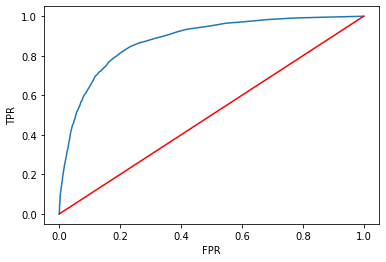

In [751]:
knn.fit(X_trains,y_train)
y_train_pred=knn.predict(X_trains)
#y_train_prob = lr.predict_proba(X_train)
y_train_prob = knn.predict_proba(X_trains)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print("\n")
y_test_pred=knn.predict(X_tests)
y_test_prob = knn.predict_proba(X_tests)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('F1 score - Test : ' , f1_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**Changing the thresholds to improve the recall score**

Best Threshold=0.103000


Text(0, 0.5, 'TPR')

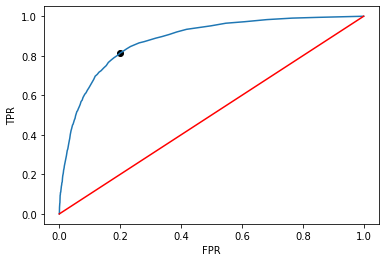

In [752]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [753]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (knn.predict_proba(X_tests)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[0 0 1 ... 0 0 1]


In [754]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[9572 2405]
 [ 294 1293]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.80      0.88     11977
           1       0.35      0.81      0.49      1587

    accuracy                           0.80     13564
   macro avg       0.66      0.81      0.68     13564
weighted avg       0.90      0.80      0.83     13564

F1 score - Test :  0.48930936613055814
Overall Accuracy - Test :  0.8010173989973459


In [755]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


# evaluate each threshold
scores = [f1_score(y_test, to_labels(y_test_prob, t)) for t in thresholds]

# get best threshold
ix = np.argmax(scores)
best_thresh_f1 = np.round(thresholds[ix],3)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

y_test_pred_newthreshold = to_labels(y_test_prob, thresholds[ix])

Threshold=0.183, F-Score=0.54126


In [756]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))

Confusion Matrix - Test :  
 [[10974  1003]
 [  626   961]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     11977
           1       0.49      0.61      0.54      1587

    accuracy                           0.88     13564
   macro avg       0.72      0.76      0.74     13564
weighted avg       0.89      0.88      0.89     13564

F1 score - Test :  0.5412559842297945
Overall Accuracy - Test :  0.8799026835741669


In [757]:
new_range = np.arange(best_thresh,(best_thresh_f1+0.001),0.001)
thres_found = False
for i in new_range:
    y_pred_new = to_labels(y_test_prob,i)
    if(precision_score(y_test,y_pred_new)>=0.4) & (recall_score(y_test,y_pred_new)>=0.8):
        print("Moving Thresholds between best recall and f1 score")
        print("Optimal Threshold : ",i)
        print('Classification Report - Test : ','\n' , classification_report(y_test,y_pred_new))
        thres_found = True
         
if(thres_found == False):
      print("No thresholds giving a combination of precision greater than 0.4 and recall greater than 0.8")
	  

No thresholds giving a combination of precision greater than 0.4 and recall greater than 0.8


### **Ada Boost**

In [419]:
from sklearn.ensemble import AdaBoostClassifier

In [420]:
ada = AdaBoostClassifier(random_state=3)
ada.fit(X_train,y_train)
y_train_pred=ada.predict(X_train)
#y_train_prob = dt.predict_proba(X_train)
y_train_prob = ada.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))


Confusion Matrix - Train :  
 [[27173   780]
 [ 2469  1225]]
Overall Accuracy - Train :  0.8973362404019338
AUC - Train :  0.8933911825192071
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     27953
           1       0.61      0.33      0.43      3694

    accuracy                           0.90     31647
   macro avg       0.76      0.65      0.69     31647
weighted avg       0.88      0.90      0.88     31647



Confusion Matrix - Test :  
 [[11660   309]
 [ 1049   546]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11969
           1       0.64      0.34      0.45      1595

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564

F1 score - Test :  0.44571428571428573
Overall Accuracy - Test :  0.8998820406959599
AUC - Test :  0.895054989234205


Text(0, 0.5, 'TPR')

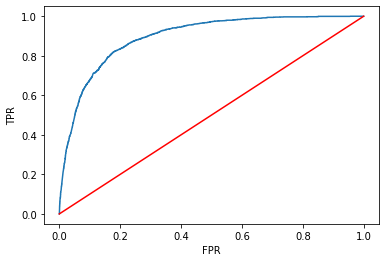

In [421]:
y_test_pred=ada.predict(X_test)
y_test_prob = ada.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**Changing the thresholds to improve the recall score**

Best Threshold=0.489000


Text(0, 0.5, 'TPR')

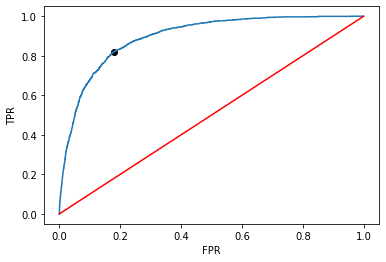

In [422]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [423]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (ada.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[0 0 0 ... 0 0 0]


In [424]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[9647 2322]
 [ 269 1326]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.81      0.88     11969
           1       0.36      0.83      0.51      1595

    accuracy                           0.81     13564
   macro avg       0.67      0.82      0.69     13564
weighted avg       0.90      0.81      0.84     13564

F1 score - Test :  0.5058172801831013
Overall Accuracy - Test :  0.8089796520200531


In [425]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


# evaluate each threshold
scores = [f1_score(y_test, to_labels(y_test_prob, t)) for t in thresholds]

# get best threshold
ix = np.argmax(scores)
best_thresh_f1 = np.round(thresholds[ix],3)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

y_test_pred_newthreshold = to_labels(y_test_prob, thresholds[ix])

Threshold=0.494, F-Score=0.56470


In [426]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))

Confusion Matrix - Test :  
 [[10974   995]
 [  576  1019]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     11969
           1       0.51      0.64      0.56      1595

    accuracy                           0.88     13564
   macro avg       0.73      0.78      0.75     13564
weighted avg       0.90      0.88      0.89     13564

F1 score - Test :  0.5646993627043503
Overall Accuracy - Test :  0.8841787083456207


In [427]:
new_range = np.arange(best_thresh,(best_thresh_f1+0.001),0.001)
thres_found = False
for i in new_range:
        
    y_pred_new = to_labels(y_test_prob,i)
    if(precision_score(y_test,y_pred_new)>=0.4) & (recall_score(y_test,y_pred_new)>=0.8):
        print("Moving Thresholds between best recall and f1 score")
        print("Optimal Threshold : ",i)
        print('Classification Report - Test : ','\n' , classification_report(y_test,y_pred_new))
        thres_found = True
         
if(thres_found == False):
      print("No thresholds giving a combination of precision greater than 0.4 and recall greater than 0.8")
	  

No thresholds giving a combination of precision greater than 0.4 and recall greater than 0.8


### **Light GBM Results**

In [428]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=3)

In [429]:
params = { 'n_estimators' : sp_randint(50,200),
        'max_depth' : sp_randint(2,15),
         'learning_rate' : sp_uniform(0.201,0.5),
         'num_leaves' : sp_randint(20,50)}

rsearch = RandomizedSearchCV(lgbm, param_distributions=params, cv=3, n_iter=200, n_jobs=-1, random_state=3)
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=3, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f47e6c9cf9

In [430]:
rsearch.best_params_

{'learning_rate': 0.20402852144437034,
 'max_depth': 2,
 'n_estimators': 104,
 'num_leaves': 21}

In [431]:
lgbm = lgb.LGBMClassifier(**rsearch.best_params_)

In [432]:
lgbm.fit(X_train,y_train)
y_train_pred=lgbm.predict(X_train)
#y_train_prob = dt.predict_proba(X_train)
y_train_prob = lgbm.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))


Confusion Matrix - Train :  
 [[27221   732]
 [ 2377  1317]]
Overall Accuracy - Train :  0.9017600404461719
AUC - Train :  0.9020906312477375
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     27953
           1       0.64      0.36      0.46      3694

    accuracy                           0.90     31647
   macro avg       0.78      0.67      0.70     31647
weighted avg       0.89      0.90      0.89     31647



Confusion Matrix - Test :  
 [[11669   300]
 [  998   597]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.67      0.37      0.48      1595

    accuracy                           0.90     13564
   macro avg       0.79      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564

F1 score - Test :  0.4791332263242376
Overall Accuracy - Test :  0.9043055145974639
AUC - Test :  0.9006746267984351


Text(0, 0.5, 'TPR')

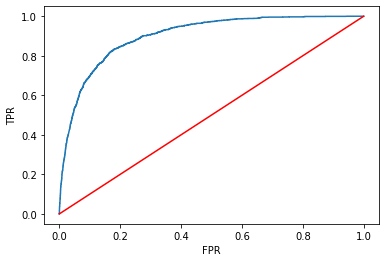

In [433]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**Changing the thresholds to improve the recall score**

Best Threshold=0.120000


Text(0, 0.5, 'TPR')

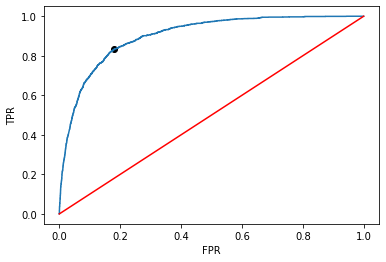

In [434]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [435]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (lgbm.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[0 0 0 ... 0 0 0]


In [436]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[9802 2167]
 [ 265 1330]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.82      0.89     11969
           1       0.38      0.83      0.52      1595

    accuracy                           0.82     13564
   macro avg       0.68      0.83      0.71     13564
weighted avg       0.90      0.82      0.85     13564

F1 score - Test :  0.5223880597014926
Overall Accuracy - Test :  0.8207018578590386


In [437]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


# evaluate each threshold
scores = [f1_score(y_test, to_labels(y_test_prob, t)) for t in thresholds]

# get best threshold
ix = np.argmax(scores)
best_thresh_f1 = np.round(thresholds[ix],3)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

y_test_pred_newthreshold = to_labels(y_test_prob, thresholds[ix])

Threshold=0.257, F-Score=0.58191


In [438]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))

Confusion Matrix - Test :  
 [[10993   976]
 [  540  1055]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.95      0.92      0.94     11969
           1       0.52      0.66      0.58      1595

    accuracy                           0.89     13564
   macro avg       0.74      0.79      0.76     13564
weighted avg       0.90      0.89      0.89     13564

F1 score - Test :  0.5819084390512963
Overall Accuracy - Test :  0.8882335594219994


In [439]:
new_range = np.arange(best_thresh,(best_thresh_f1+0.001),0.001)
thres_found = False
for i in new_range:
        
    y_pred_new = to_labels(y_test_prob,i)
    if(precision_score(y_test,y_pred_new)>=0.4) & (recall_score(y_test,y_pred_new)>=0.8):
        print("Moving Thresholds between best recall and f1 score")
        print("Optimal Threshold : ",i)
        print('Classification Report - Test : ','\n' , classification_report(y_test,y_pred_new))
        thres_found = True
          
if(thres_found == False):
      print("No thresholds giving a combination of precision greater than 0.4 and recall greater than 0.8")
	  

Moving Thresholds between best recall and f1 score
Optimal Threshold :  0.136
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     11969
           1       0.40      0.81      0.54      1595

    accuracy                           0.84     13564
   macro avg       0.69      0.82      0.72     13564
weighted avg       0.90      0.84      0.86     13564

Moving Thresholds between best recall and f1 score
Optimal Threshold :  0.137
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     11969
           1       0.40      0.80      0.54      1595

    accuracy                           0.84     13564
   macro avg       0.69      0.82      0.72     13564
weighted avg       0.90      0.84      0.86     13564

Moving Thresholds between best recall and f1 score
Optimal Threshold :  0.138
Classification Report - Test :  
           

### **Ada Boost with RadomForest as Base estimator**

In [444]:
ada = AdaBoostClassifier(base_estimator=rf, random_state=3)
ada.fit(X_train,y_train)
y_train_pred=ada.predict(X_train)
#y_train_prob = dt.predict_proba(X_train)
y_train_prob = ada.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))


Confusion Matrix - Train :  
 [[27945     0]
 [    0  3702]]
Overall Accuracy - Train :  1.0
AUC - Train :  1.0
Classification Report - Train :  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27945
           1       1.00      1.00      1.00      3702

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647



Confusion Matrix - Test :  
 [[11520   457]
 [ 1019   568]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     11977
           1       0.55      0.36      0.43      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.66      0.69     13564
weighted avg       0.88      0.89      0.88     13564

F1 score - Test :  0.4349157733537519
Overall Accuracy - Test :  0.8911825420230021
AUC - Test :  0.8814551035883258


Text(0, 0.5, 'TPR')

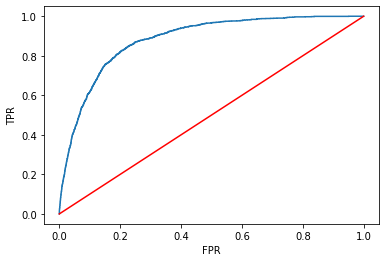

In [445]:
y_test_pred=ada.predict(X_test)
y_test_prob = ada.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**Changing the thresholds to improve the recall score**

Best Threshold=0.450000


Text(0, 0.5, 'TPR')

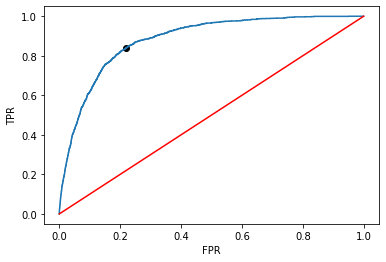

In [446]:
# Plotting the ROC-AUC and identifying the optimal J-Statistic value

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
J = tpr - fpr     #Youden's J-Statistic
ix = np.argmax(J)
best_thresh = np.round(thresholds[ix],3)
print('Best Threshold=%f' % (best_thresh))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [447]:
#Testing with new threshold using Youden’s J statistic.

y_test_pred_newthreshold = (ada.predict_proba(X_test)>=best_thresh).astype(int)[:,1]
print(y_test_pred_newthreshold)

[0 1 1 ... 0 0 0]


In [448]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))


Confusion Matrix - Test :  
 [[9328 2649]
 [ 251 1336]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.78      0.87     11977
           1       0.34      0.84      0.48      1587

    accuracy                           0.79     13564
   macro avg       0.65      0.81      0.67     13564
weighted avg       0.90      0.79      0.82     13564

F1 score - Test :  0.47954055994257005
Overall Accuracy - Test :  0.7861987614273076


In [449]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


# evaluate each threshold
scores = [f1_score(y_test, to_labels(y_test_prob, t)) for t in thresholds]

# get best threshold
ix = np.argmax(scores)
best_thresh_f1 = np.round(thresholds[ix],3)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

y_test_pred_newthreshold = to_labels(y_test_prob, thresholds[ix])

Threshold=0.468, F-Score=0.52514


In [450]:
#Applying 'y' predicted using the new threshold to find metrics

print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred_newthreshold))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred_newthreshold))
print('F1 score - Test : ', f1_score(y_test,y_test_pred_newthreshold))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred_newthreshold))

Confusion Matrix - Test :  
 [[10337  1640]
 [  438  1149]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.86      0.91     11977
           1       0.41      0.72      0.53      1587

    accuracy                           0.85     13564
   macro avg       0.69      0.79      0.72     13564
weighted avg       0.90      0.85      0.86     13564

F1 score - Test :  0.5251371115173674
Overall Accuracy - Test :  0.8468003538779121


In [451]:
new_range = np.arange(best_thresh,(best_thresh_f1+0.001),0.001)
thres_found = False
for i in new_range:
        
    y_pred_new = to_labels(y_test_prob,i)
    if(precision_score(y_test,y_pred_new)>=0.4) & (recall_score(y_test,y_pred_new)>=0.8):
        print("Moving Thresholds between best recall and f1 score")
        print("Optimal Threshold : ",i)
        print('Classification Report - Test : ','\n' , classification_report(y_test,y_pred_new))
        thres_found = True
         
if(thres_found == False):
      print("No thresholds giving a combination of precision greater than 0.4 and recall greater than 0.8")
	  

No thresholds giving a combination of precision greater than 0.4 and recall greater than 0.8


### **Resampling for imbalanced data**

As the dataset has a slight imbalance of majority class to minority class ratio as 88:12, we can try different sampling methods to check if the model performance increase.

**Best results were found in LightGBM and Random Forest hence checking each sampling method in both**

#### **Light GBM Sampling Results**

Here we are using the algorithm - LightGBM, and for each sampling method we are trying different values/combinations for sampling_stratergy to see which gives the best performance.

In [452]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=3,boosting_type='dart')

**1)Random Oversampling**

In [453]:
from imblearn.over_sampling import RandomOverSampler

In [467]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    sampling = RandomOverSampler(sampling_strategy= i,random_state=3)
    X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)
    lgbm.fit(X_resampled, y_resampled)
    y_pred = lgbm.predict(X_test)
    y_pred_prob = lgbm.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result  

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.900398,0.497956,0.606884,0.422180,0.895275,0.15
1,0.899882,0.543989,0.582315,0.510397,0.895255,0.20
2,0.893615,0.553112,0.543849,0.562697,0.895604,0.25
3,0.886243,0.552624,0.511815,0.600504,0.894743,0.30
4,0.882557,0.559580,0.498522,0.637681,0.895359,0.35
5,0.873857,0.556161,0.472663,0.675488,0.895371,0.40
6,0.869139,0.557025,0.461157,0.703214,0.895095,0.45
7,0.860808,0.548109,0.441914,0.721487,0.894775,0.50
8,0.855574,0.546633,0.431968,0.744171,0.895053,0.55
9,0.851298,0.545823,0.424667,0.763705,0.895338,0.60


In [472]:
result[(result['recall'] >= 0.8) & (result['precision'] >= 0.38)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
13,0.827706,0.523159,0.386844,0.807813,0.895731,0.80
14,0.824757,0.519312,0.382370,0.809074,0.895861,0.85
15,0.822840,0.520264,0.380771,0.821046,0.896385,0.90


In [473]:
sampling = RandomOverSampler(sampling_strategy=0.8,random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [474]:
lgbm.fit(X_resampled, y_resampled)
y_resampled_pred=lgbm.predict(X_resampled)
y_resampled_prob = lgbm.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[23418  4527]
 [ 3264 19092]]
Overall Accuracy - Train :  0.8451124232122622
AUC - Train :  0.9202291232544975
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.88      0.84      0.86     27945
           1       0.81      0.85      0.83     22356

    accuracy                           0.85     50301
   macro avg       0.84      0.85      0.84     50301
weighted avg       0.85      0.85      0.85     50301



Confusion Matrix - Test :  
 [[9945 2032]
 [ 305 1282]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.83      0.89     11977
           1       0.39      0.81      0.52      1587

    accuracy                           0.83     13564
   macro avg       0.68      0.82      0.71     13564
weighted avg       0.90      0.83      0.85     13564

F1 score - Test :  0.5231585390736585
Overall Accuracy - Test :  0.8277056915364199
AUC - Test :  0.8957313110998979


Text(0, 0.5, 'TPR')

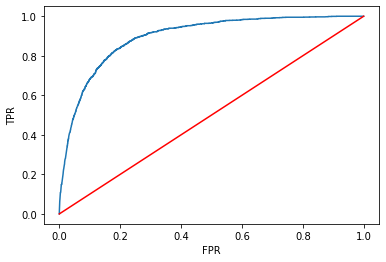

In [475]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**2)Random Undersampling**

In [476]:
from imblearn.under_sampling import RandomUnderSampler

In [477]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    us = RandomUnderSampler(sampling_strategy= i,random_state=3)
    X_resampled ,y_resampled = us.fit_resample(X_train, y_train)
    lgbm.fit(X_resampled, y_resampled)
    y_pred = lgbm.predict(X_test)
    y_pred_prob = lgbm.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result   

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.900029,0.492895,0.606256,0.415249,0.895422,0.15
1,0.897597,0.535296,0.570613,0.504096,0.894960,0.20
2,0.894500,0.556279,0.547619,0.565217,0.895989,0.25
3,0.886612,0.559312,0.512874,0.614997,0.895423,0.30
4,0.878649,0.558002,0.486196,0.654694,0.895438,0.35
5,0.872678,0.557973,0.469828,0.686830,0.895085,0.40
6,0.866264,0.554300,0.454289,0.710775,0.894388,0.45
7,0.857638,0.548515,0.436059,0.739130,0.895096,0.50
8,0.852551,0.546896,0.426954,0.760555,0.894904,0.55
9,0.847316,0.541713,0.417462,0.771267,0.894830,0.60


In [478]:
result[(result['recall'] >= 0.8) & (result['precision'] >= 0.38)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
13,0.825273,0.519075,0.38282,0.805923,0.894307,0.8


In [479]:
sampling = RandomUnderSampler(sampling_strategy=0.8,random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [480]:
lgbm.fit(X_resampled, y_resampled)
y_resampled_pred=lgbm.predict(X_resampled)
y_resampled_prob = lgbm.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[3944  683]
 [ 591 3111]]
Overall Accuracy - Train :  0.8470404610397406
AUC - Train :  0.9236470756232327
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4627
           1       0.82      0.84      0.83      3702

    accuracy                           0.85      8329
   macro avg       0.84      0.85      0.85      8329
weighted avg       0.85      0.85      0.85      8329



Confusion Matrix - Test :  
 [[9915 2062]
 [ 308 1279]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.83      0.89     11977
           1       0.38      0.81      0.52      1587

    accuracy                           0.83     13564
   macro avg       0.68      0.82      0.71     13564
weighted avg       0.90      0.83      0.85     13564

F1 score - Test :  0.5190746753246754
Overall Accuracy - Test :  0.8252727808905927
AUC - Test :  0.8943070311354482


Text(0, 0.5, 'TPR')

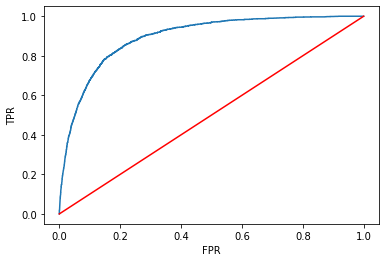

In [481]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**3)SMOTE Oversampling**

In [482]:
from imblearn.over_sampling import SMOTE

In [483]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    smote = SMOTE(sampling_strategy= i,random_state=3)
    X_resampled ,y_resampled = smote.fit_resample(X_train, y_train)
    lgbm.fit(X_resampled, y_resampled)
    y_pred = lgbm.predict(X_test)
    y_pred_prob = lgbm.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result   

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.898113,0.490789,0.590949,0.419660,0.893650,0.15
1,0.892952,0.522996,0.546328,0.501575,0.890189,0.20
2,0.887423,0.522663,0.518610,0.526780,0.886785,0.25
3,0.882704,0.528593,0.498881,0.562067,0.884884,0.30
4,0.876585,0.528185,0.477817,0.590422,0.881828,0.35
5,0.870318,0.526259,0.459548,0.615627,0.880106,0.40
6,0.867443,0.530058,0.452881,0.638941,0.879148,0.45
7,0.861766,0.524232,0.438828,0.650914,0.878443,0.50
8,0.857048,0.524172,0.429260,0.672968,0.877193,0.55
9,0.853509,0.523387,0.422541,0.687461,0.876327,0.60


In [489]:
result[(result['recall'] >= 0.7) & (result['precision'] >= 0.38)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
11,0.844810,0.514865,0.405887,0.703844,0.875291,0.70
12,0.842598,0.514221,0.402422,0.712035,0.873665,0.75
13,0.838691,0.510733,0.395841,0.719597,0.872202,0.80
14,0.836331,0.511444,0.392966,0.732199,0.872929,0.85
15,0.831761,0.504129,0.384743,0.730939,0.871492,0.90
16,0.828959,0.504485,0.381583,0.744171,0.871075,0.95


In [505]:
sampling = SMOTE(sampling_strategy=0.85,random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [506]:
lgbm.fit(X_resampled, y_resampled)
y_resampled_pred=lgbm.predict(X_resampled)
y_resampled_prob = lgbm.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[23896  4049]
 [ 2586 21167]]
Overall Accuracy - Train :  0.8716584780842586
AUC - Train :  0.9428911575855639
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     27945
           1       0.84      0.89      0.86     23753

    accuracy                           0.87     51698
   macro avg       0.87      0.87      0.87     51698
weighted avg       0.87      0.87      0.87     51698



Confusion Matrix - Test :  
 [[10182  1795]
 [  425  1162]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.85      0.90     11977
           1       0.39      0.73      0.51      1587

    accuracy                           0.84     13564
   macro avg       0.68      0.79      0.71     13564
weighted avg       0.89      0.84      0.86     13564

F1 score - Test :  0.511443661971831
Overall Accuracy - Test :  0.8363314656443527
AUC - Test :  0.8729285478326212


Text(0, 0.5, 'TPR')

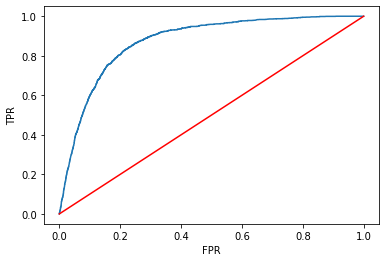

In [507]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
4)

**4)Combining SMOTE and Random Undersampling**

In [539]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    over_sampling = SMOTE(sampling_strategy= i,random_state=3)
    X_resampled ,y_resampled = over_sampling.fit_resample(X_train, y_train)
    
    for j in np.arange(i,1,0.05):
        under_sampler = RandomUnderSampler(sampling_strategy = np.round(j,2), random_state=3)
        X_under ,y_under = under_sampler.fit_resample(X_resampled ,y_resampled)
        lgbm.fit(X_under ,y_under)
        y_pred = lgbm.predict(X_test)
        y_pred_prob = lgbm.predict_proba(X_test)[:,1]
        result = result.append({'sample_strategy_o':i,
                                'sample_strategy_u':np.round(j,2),
                                'accuracy':accuracy_score(y_test,y_pred),
                                  'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                                  'precision':precision_score(y_test, y_pred), 
                                  'recall':recall_score(y_test, y_pred),
                                  'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
print("done")   
result

done


,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy_o,sample_strategy_u
0,0.897302,0.488432,0.585387,0.419030,0.893420,0.15,0.15
1,0.894942,0.529858,0.556094,0.505986,0.894228,0.15,0.20
2,0.891994,0.553762,0.535967,0.572779,0.894572,0.15,0.25
3,0.885137,0.552813,0.507644,0.606805,0.893959,0.15,0.30
4,0.877912,0.553398,0.483734,0.646503,0.894374,0.15,0.35
...,...,...,...,...,...,...,...
151,0.825936,0.504096,0.378072,0.756144,0.872069,0.85,1.00
152,0.831318,0.504762,0.384438,0.734720,0.871702,0.90,0.90
153,0.828738,0.504374,0.381290,0.744802,0.871701,0.90,0.95
154,0.828001,0.503511,0.380141,0.745432,0.870798,0.95,0.95


In [540]:
result[(result['recall'] >= 0.79) & (result['precision'] >= 0.39)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy_o,sample_strategy_u
11,0.836995,0.532657,0.400763,0.793951,0.893799,0.15,0.70
12,0.835963,0.531875,0.399242,0.796471,0.894511,0.15,0.75
13,0.830728,0.526207,0.391224,0.803403,0.894369,0.15,0.80
28,0.834046,0.527993,0.395663,0.793321,0.891260,0.20,0.75


In [648]:
over_sampling = SMOTE(sampling_strategy= 0.15,random_state=3)
X_over_sampled ,y_over_sampled = over_sampling.fit_resample(X_train, y_train)
under_sampler = RandomUnderSampler(sampling_strategy = 0.75, random_state=3)
X_resampled ,y_resampled = under_sampler.fit_resample(X_over_sampled ,y_over_sampled)

In [649]:
lgbm.fit(X_resampled, y_resampled)
y_resampled_pred=lgbm.predict(X_resampled)
y_resampled_prob = lgbm.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[4810  778]
 [ 702 3489]]
Overall Accuracy - Train :  0.8486552817261479
AUC - Train :  0.9233502544140075
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      5588
           1       0.82      0.83      0.83      4191

    accuracy                           0.85      9779
   macro avg       0.85      0.85      0.85      9779
weighted avg       0.85      0.85      0.85      9779



Confusion Matrix - Test :  
 [[10075  1902]
 [  323  1264]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     11977
           1       0.40      0.80      0.53      1587

    accuracy                           0.84     13564
   macro avg       0.68      0.82      0.72     13564
weighted avg       0.90      0.84      0.86     13564

F1 score - Test :  0.5318746055123079
Overall Accuracy - Test :  0.8359628428192274
AUC - Test :  0.8945110295678564


Text(0, 0.5, 'TPR')

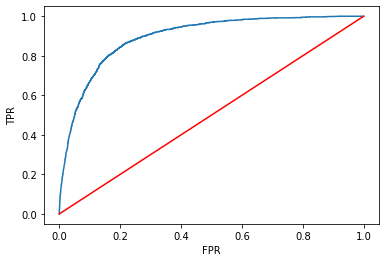

In [650]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**5) Combination of Random Oversampling and Random Undersampling**

In [553]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    over_sampling = RandomOverSampler(sampling_strategy= i,random_state=3)
    X_resampled ,y_resampled = over_sampling.fit_resample(X_train, y_train)
    
    for j in np.arange(i,1,0.05):
        under_sampler = RandomUnderSampler(sampling_strategy = np.round(j,2), random_state=3)
        X_under ,y_under = under_sampler.fit_resample(X_resampled ,y_resampled)
        lgbm.fit(X_under ,y_under)
        y_pred = lgbm.predict(X_test)
        y_pred_prob = lgbm.predict_proba(X_test)[:,1]
        result = result.append({'sample_strategy_o':i,
                                'sample_strategy_u':np.round(j,2),
                                'accuracy':accuracy_score(y_test,y_pred),
                                  'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                                  'precision':precision_score(y_test, y_pred), 
                                  'recall':recall_score(y_test, y_pred),
                                  'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
print("done")   

done


In [556]:
result[(result['recall'] >= 0.8) & (result['precision'] >= 0.39)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy_o,sample_strategy_u
13,0.830507,0.525882,0.390865,0.803403,0.895120,0.15,0.80
58,0.832277,0.528693,0.393827,0.804033,0.894710,0.30,0.80
71,0.830581,0.526576,0.391185,0.805293,0.895241,0.35,0.80
83,0.830950,0.525946,0.391385,0.801512,0.895114,0.40,0.80
113,0.830434,0.527527,0.391344,0.809074,0.896368,0.55,0.80
120,0.834120,0.530271,0.396503,0.800252,0.896495,0.60,0.75
128,0.829770,0.526553,0.390274,0.809074,0.895877,0.65,0.80
134,0.829770,0.526165,0.390140,0.807813,0.895480,0.70,0.80
140,0.829991,0.526294,0.390430,0.807183,0.895268,0.75,0.80


In [569]:
over_sampling = RandomOverSampler(sampling_strategy= 0.60,random_state=3)
X_over_sampled ,y_over_sampled = over_sampling.fit_resample(X_train, y_train)
under_sampler = RandomUnderSampler(sampling_strategy = 0.75, random_state=3)
X_resampled ,y_resampled = under_sampler.fit_resample(X_over_sampled ,y_over_sampled)

In [570]:
lgbm.fit(X_resampled, y_resampled)
y_resampled_pred=lgbm.predict(X_resampled)
y_resampled_prob = lgbm.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[18953  3403]
 [ 2521 14246]]
Overall Accuracy - Train :  0.8485801191115201
AUC - Train :  0.921190982886352
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.88      0.85      0.86     22356
           1       0.81      0.85      0.83     16767

    accuracy                           0.85     39123
   macro avg       0.84      0.85      0.85     39123
weighted avg       0.85      0.85      0.85     39123



Confusion Matrix - Test :  
 [[10044  1933]
 [  317  1270]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     11977
           1       0.40      0.80      0.53      1587

    accuracy                           0.83     13564
   macro avg       0.68      0.82      0.71     13564
weighted avg       0.90      0.83      0.86     13564

F1 score - Test :  0.5302713987473904
Overall Accuracy - Test :  0.8341197286936007
AUC - Test :  0.8964954831774554


Text(0, 0.5, 'TPR')

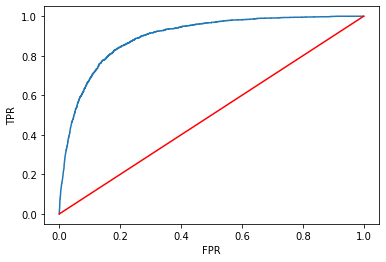

In [571]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**6) Borderline SMOTE oversampling**

In [572]:
from imblearn.over_sampling import BorderlineSMOTE

In [573]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    sampling = BorderlineSMOTE(sampling_strategy= i)
    X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)
    lgbm.fit(X_resampled, y_resampled)
    y_pred = lgbm.predict(X_test)
    y_pred_prob = lgbm.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result  

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.898776,0.497989,0.593206,0.429112,0.893460,0.15
1,0.891404,0.521908,0.538153,0.506616,0.888964,0.20
2,0.884621,0.522720,0.506501,0.540013,0.886162,0.25
3,0.879534,0.531537,0.487638,0.584121,0.885084,0.30
4,0.874226,0.534896,0.471408,0.618147,0.883015,0.35
5,0.867591,0.525871,0.452522,0.627599,0.881003,0.40
6,0.865453,0.527814,0.447761,0.642722,0.879426,0.45
7,0.860218,0.524812,0.435705,0.659735,0.878691,0.50
8,0.855795,0.521994,0.426347,0.672968,0.878059,0.55
9,0.852846,0.523400,0.421376,0.690611,0.876355,0.60


In [578]:
result[(result['recall'] >= 0.75) & (result['precision'] >= 0.38)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
17,0.833751,0.514113,0.390635,0.751733,0.873227,1.0


In [580]:
sampling = BorderlineSMOTE(sampling_strategy= 1,random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [581]:
lgbm.fit(X_resampled, y_resampled)
y_resampled_pred=lgbm.predict(X_resampled)
y_resampled_prob = lgbm.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[23804  4141]
 [ 2217 25728]]
Overall Accuracy - Train :  0.8862408302021828
AUC - Train :  0.9526888491986775
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.91      0.85      0.88     27945
           1       0.86      0.92      0.89     27945

    accuracy                           0.89     55890
   macro avg       0.89      0.89      0.89     55890
weighted avg       0.89      0.89      0.89     55890



Confusion Matrix - Test :  
 [[10125  1852]
 [  404  1183]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.85      0.90     11977
           1       0.39      0.75      0.51      1587

    accuracy                           0.83     13564
   macro avg       0.68      0.80      0.71     13564
weighted avg       0.89      0.83      0.85     13564

F1 score - Test :  0.5118996105581999
Overall Accuracy - Test :  0.8336773813034503
AUC - Test :  0.8729307311814142


Text(0, 0.5, 'TPR')

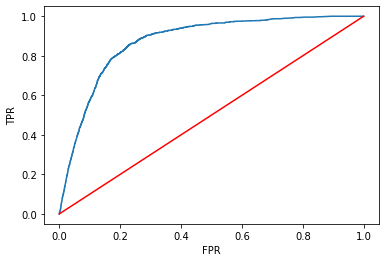

In [582]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**7)SVM SMOTE**

In [583]:
from imblearn.over_sampling import SVMSMOTE

In [584]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.8,0.85,0.9,0.95,1]
for i in ss:
    sampling = SVMSMOTE(sampling_strategy= i)
    X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)
    lgbm.fit(X_resampled, y_resampled)
    y_pred = lgbm.predict(X_test)
    y_pred_prob = lgbm.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result  

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.898924,0.490902,0.597649,0.416509,0.893799,0.15
1,0.895680,0.530680,0.560224,0.504096,0.893287,0.20
2,0.892510,0.536849,0.541320,0.532451,0.891478,0.25
3,0.889339,0.546114,0.525000,0.568998,0.891088,0.30
4,0.889413,0.544627,0.525483,0.565217,0.891147,0.35
5,0.883220,0.551020,0.500773,0.612476,0.889185,0.40
6,0.880198,0.549237,0.490585,0.623819,0.889265,0.45
7,0.869802,0.537212,0.459847,0.645873,0.886962,0.50
8,0.863241,0.532863,0.443792,0.666667,0.884827,0.55
9,0.863904,0.539880,0.446598,0.682420,0.884586,0.60


In [591]:
result[(result['recall'] >= 0.7) & (result['precision'] >= 0.35)]


,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
13,0.856901,0.534644,0.431502,0.702583,0.884274,0.80
14,0.859923,0.539059,0.438264,0.700063,0.886073,0.85
15,0.849971,0.530998,0.418605,0.725898,0.882966,0.90
16,0.854763,0.536034,0.427980,0.717076,0.885969,0.95
17,0.840829,0.522451,0.402522,0.744171,0.882570,1.00


In [592]:
sampling = SVMSMOTE(sampling_strategy= 0.85,random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [593]:
lgbm.fit(X_resampled, y_resampled)
y_resampled_pred=lgbm.predict(X_resampled)
y_resampled_prob = lgbm.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[24427  3518]
 [ 2174 21579]]
Overall Accuracy - Train :  0.8898990289759758
AUC - Train :  0.9545038561372934
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.92      0.87      0.90     27945
           1       0.86      0.91      0.88     23753

    accuracy                           0.89     51698
   macro avg       0.89      0.89      0.89     51698
weighted avg       0.89      0.89      0.89     51698



Confusion Matrix - Test :  
 [[10389  1588]
 [  438  1149]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.87      0.91     11977
           1       0.42      0.72      0.53      1587

    accuracy                           0.85     13564
   macro avg       0.69      0.80      0.72     13564
weighted avg       0.90      0.85      0.87     13564

F1 score - Test :  0.5314523589269196
Overall Accuracy - Test :  0.8506340312592156
AUC - Test :  0.8834104371122156


Text(0, 0.5, 'TPR')

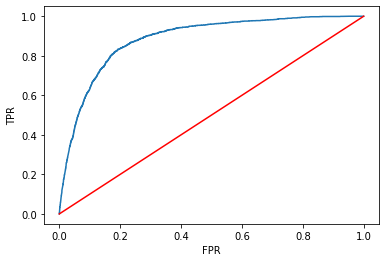

In [594]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**8)ADASYN**

In [595]:
from imblearn.over_sampling import ADASYN

In [596]:
result= pd.DataFrame()
ss  = [0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.8,0.85,0.9,0.95,1]
for i in ss:
    sampling = ADASYN(sampling_strategy= i)
    X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)
    lgbm.fit(X_resampled, y_resampled)
    y_pred = lgbm.predict(X_test)
    y_pred_prob = lgbm.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result  

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.889929,0.516359,0.531333,0.502205,0.885601,0.20
1,0.887054,0.523928,0.516861,0.531191,0.884942,0.25
2,0.878723,0.521941,0.484358,0.565848,0.882116,0.30
3,0.875332,0.527522,0.473896,0.594833,0.879624,0.35
4,0.866780,0.521578,0.449772,0.620668,0.876853,0.40
5,0.861914,0.521828,0.438627,0.643982,0.875463,0.45
6,0.857269,0.517688,0.428101,0.654694,0.874078,0.50
7,0.852256,0.512646,0.417426,0.664146,0.874041,0.55
8,0.844220,0.507115,0.402593,0.684940,0.870075,0.60
9,0.845400,0.508324,0.404780,0.683050,0.870999,0.65


In [600]:
result[(result['recall'] >= 0.75) & (result['precision'] >= 0.35)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
16,0.819743,0.494939,0.368162,0.754883,0.865596,1.0


In [601]:
sampling = ADASYN(sampling_strategy= 1,random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [602]:
lgbm.fit(X_resampled, y_resampled)
y_resampled_pred=lgbm.predict(X_resampled)
y_resampled_prob = lgbm.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[23289  4656]
 [ 2701 24854]]
Overall Accuracy - Train :  0.8674414414414414
AUC - Train :  0.9400859511640847
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.90      0.83      0.86     27945
           1       0.84      0.90      0.87     27555

    accuracy                           0.87     55500
   macro avg       0.87      0.87      0.87     55500
weighted avg       0.87      0.87      0.87     55500



Confusion Matrix - Test :  
 [[9921 2056]
 [ 394 1193]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.83      0.89     11977
           1       0.37      0.75      0.49      1587

    accuracy                           0.82     13564
   macro avg       0.66      0.79      0.69     13564
weighted avg       0.89      0.82      0.84     13564

F1 score - Test :  0.49338296112489655
Overall Accuracy - Test :  0.8193748156885874
AUC - Test :  0.865384314895926


Text(0, 0.5, 'TPR')

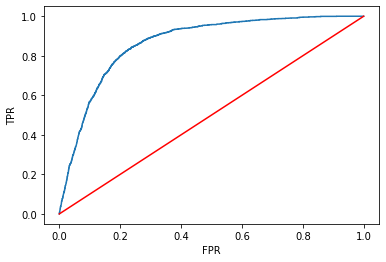

In [603]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**9) Tomek Links**

In [604]:
from imblearn.under_sampling import TomekLinks

In [618]:
sampling = TomekLinks(sampling_strategy='majority',random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [619]:
lgbm.fit(X_resampled, y_resampled)
y_resampled_pred=lgbm.predict(X_resampled)
y_resampled_prob = lgbm.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[25768   735]
 [ 1920  1782]]
Overall Accuracy - Train :  0.9121006455884787
AUC - Train :  0.9221644184374467
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     26503
           1       0.71      0.48      0.57      3702

    accuracy                           0.91     30205
   macro avg       0.82      0.73      0.76     30205
weighted avg       0.90      0.91      0.90     30205



Confusion Matrix - Test :  
 [[11498   479]
 [  875   712]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     11977
           1       0.60      0.45      0.51      1587

    accuracy                           0.90     13564
   macro avg       0.76      0.70      0.73     13564
weighted avg       0.89      0.90      0.89     13564

F1 score - Test :  0.5125989920806335
Overall Accuracy - Test :  0.9001769389560602
AUC - Test :  0.8947909980160987


Text(0, 0.5, 'TPR')

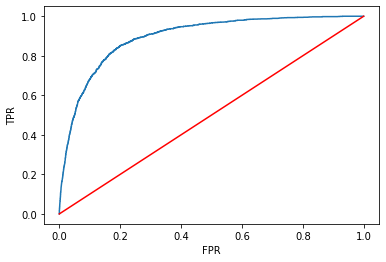

In [620]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**10) Edited Nearest Neighbors**

In [608]:
from imblearn.under_sampling import EditedNearestNeighbours

In [621]:
sampling = EditedNearestNeighbours(sampling_strategy='majority',random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [622]:
lgbm.fit(X_resampled, y_resampled)
y_resampled_pred=lgbm.predict(X_resampled)
y_resampled_prob = lgbm.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[21464   547]
 [ 1346  2356]]
Overall Accuracy - Train :  0.9263796523159491
AUC - Train :  0.9479394615839765
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     22011
           1       0.81      0.64      0.71      3702

    accuracy                           0.93     25713
   macro avg       0.88      0.81      0.84     25713
weighted avg       0.92      0.93      0.92     25713



Confusion Matrix - Test :  
 [[11040   937]
 [  623   964]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     11977
           1       0.51      0.61      0.55      1587

    accuracy                           0.88     13564
   macro avg       0.73      0.76      0.74     13564
weighted avg       0.90      0.88      0.89     13564

F1 score - Test :  0.5527522935779816
Overall Accuracy - Test :  0.8849896785608965
AUC - Test :  0.8914157775307525


Text(0, 0.5, 'TPR')

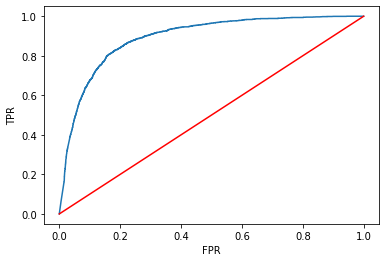

In [623]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**11) SMOTE Tomek**

In [624]:
from imblearn.combine import SMOTETomek

In [625]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    sampling = SMOTETomek(sampling_strategy=i)
    X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)
    lgbm.fit(X_resampled, y_resampled)
    y_pred = lgbm.predict(X_test)
    y_pred_prob = lgbm.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result  

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.900914,0.478261,0.622851,0.388154,0.891210,0.15
1,0.893321,0.501206,0.553272,0.458097,0.887457,0.20
2,0.889339,0.523945,0.527458,0.520479,0.887589,0.25
3,0.881820,0.522206,0.495475,0.551985,0.883026,0.30
4,0.876364,0.527206,0.477041,0.589162,0.882692,0.35
5,0.871203,0.529491,0.462371,0.619408,0.880912,0.40
6,0.866632,0.528538,0.450667,0.638941,0.881478,0.45
7,0.861029,0.524590,0.437342,0.655325,0.878859,0.50
8,0.855721,0.519755,0.425643,0.667297,0.878507,0.55
9,0.853214,0.524481,0.422308,0.691871,0.877055,0.60


In [628]:
result[(result['recall'] >= 0.75) & (result['precision'] >= 0.35)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
17,0.827485,0.506537,0.380666,0.756774,0.871637,1.0


In [629]:
smote_tomek = SMOTETomek(sampling_strategy=1,random_state=3)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

In [630]:
lgbm.fit(X_resampled, y_resampled)
y_resampled_pred=lgbm.predict(X_resampled)
y_resampled_prob = lgbm.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[22846  4089]
 [ 2433 24502]]
Overall Accuracy - Train :  0.8789307592351958
AUC - Train :  0.9478499770277291
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.90      0.85      0.88     26935
           1       0.86      0.91      0.88     26935

    accuracy                           0.88     53870
   macro avg       0.88      0.88      0.88     53870
weighted avg       0.88      0.88      0.88     53870



Confusion Matrix - Test :  
 [[10019  1958]
 [  394  1193]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.84      0.89     11977
           1       0.38      0.75      0.50      1587

    accuracy                           0.83     13564
   macro avg       0.67      0.79      0.70     13564
weighted avg       0.89      0.83      0.85     13564

F1 score - Test :  0.503588011819333
Overall Accuracy - Test :  0.826599823061044
AUC - Test :  0.8721012164725092


Text(0, 0.5, 'TPR')

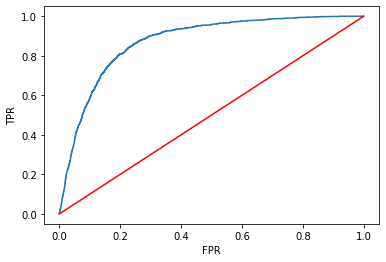

In [631]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**12) SMOTE ENN**

In [632]:
from imblearn.combine import SMOTEENN

In [633]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    sampling = SMOTEENN(sampling_strategy=i)
    X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)
    lgbm.fit(X_resampled, y_resampled)
    y_pred = lgbm.predict(X_test)
    y_pred_prob = lgbm.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result  

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.890666,0.312471,0.591228,0.212350,0.848524,0.15
1,0.889045,0.398722,0.544760,0.314430,0.858069,0.20
2,0.886538,0.473126,0.517991,0.435413,0.872220,0.25
3,0.883220,0.523179,0.500865,0.547574,0.878406,0.30
4,0.874889,0.522375,0.472024,0.584751,0.876768,0.35
5,0.871277,0.536378,0.463515,0.636421,0.880180,0.40
6,0.861103,0.531343,0.438964,0.672968,0.879880,0.45
7,0.856163,0.536249,0.430534,0.710775,0.879608,0.50
8,0.844367,0.524871,0.408263,0.734720,0.880411,0.55
9,0.840607,0.524626,0.402904,0.751733,0.881342,0.60


In [635]:
result[(result['recall'] >= 0.75) & (result['precision'] >= 0.38)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
9,0.840607,0.524626,0.402904,0.751733,0.881342,0.60
10,0.833604,0.520909,0.392766,0.773157,0.881427,0.65


In [645]:
smote_enn = SMOTEENN(sampling_strategy=0.65,random_state=3)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [646]:
lgbm.fit(X_resampled, y_resampled)
y_resampled_pred=lgbm.predict(X_resampled)
y_resampled_prob = lgbm.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[17877  1288]
 [ 1083 11658]]
Overall Accuracy - Train :  0.9256879583777345
AUC - Train :  0.9774052321335954
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.94      0.93      0.94     19165
           1       0.90      0.91      0.91     12741

    accuracy                           0.93     31906
   macro avg       0.92      0.92      0.92     31906
weighted avg       0.93      0.93      0.93     31906



Confusion Matrix - Test :  
 [[10118  1859]
 [  368  1219]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.84      0.90     11977
           1       0.40      0.77      0.52      1587

    accuracy                           0.84     13564
   macro avg       0.68      0.81      0.71     13564
weighted avg       0.90      0.84      0.86     13564

F1 score - Test :  0.5226152197213291
Overall Accuracy - Test :  0.8358153936891772
AUC - Test :  0.8816783312733569


Text(0, 0.5, 'TPR')

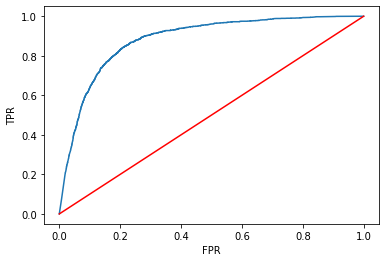

In [647]:
y_test_pred=lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

The best performance was seen with the combination of SMOTE and Random undersampling and also for Random oversampling and Random undersampling

#### **Random Forest Sampling Results**

Here we are using the algorithm - Random Forest Classifier, and for each sampling method we are trying different values/combinations for sampling_stratergy to see which gives the best performance.

In [ ]:
rf = RandomForestClassifier(**rsearch.best_params_)

**1)Random Oversampling**

In [659]:
from imblearn.over_sampling import RandomOverSampler

In [660]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    sampling = RandomOverSampler(sampling_strategy= i,random_state=3)
    X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)
    rf.fit(X_resampled, y_resampled)
    y_pred = rf.predict(X_test)
    y_pred_prob = rf.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result  

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.900472,0.485910,0.614052,0.402016,0.893067,0.15
1,0.898850,0.526570,0.581998,0.480781,0.892967,0.20
2,0.893689,0.537821,0.547293,0.528670,0.892114,0.25
3,0.889266,0.548135,0.524467,0.574039,0.891783,0.30
4,0.885727,0.554598,0.509773,0.608066,0.891640,0.35
5,0.879239,0.547264,0.487445,0.623819,0.891194,0.40
6,0.874005,0.548242,0.472222,0.653434,0.890655,0.45
7,0.866559,0.542467,0.452934,0.676118,0.890448,0.50
8,0.864494,0.544147,0.448671,0.691241,0.890996,0.55
9,0.857343,0.535860,0.432610,0.703844,0.890666,0.60


In [664]:
result[(result['recall'] >= 0.78) & (result['precision'] >= 0.38)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
16,0.834783,0.525915,0.395860,0.783239,0.890371,0.95
17,0.832277,0.523560,0.392095,0.787650,0.890066,1.00


In [665]:
sampling = RandomOverSampler(sampling_strategy=0.95,random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [666]:
rf.fit(X_resampled, y_resampled)
y_resampled_pred=rf.predict(X_resampled)
y_resampled_prob = rf.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[23978  3967]
 [ 2264 24283]]
Overall Accuracy - Train :  0.8856529398810835
AUC - Train :  0.9587304133040444
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.91      0.86      0.89     27945
           1       0.86      0.91      0.89     26547

    accuracy                           0.89     54492
   macro avg       0.89      0.89      0.89     54492
weighted avg       0.89      0.89      0.89     54492



Confusion Matrix - Test :  
 [[10096  1881]
 [  351  1236]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     11977
           1       0.40      0.78      0.53      1587

    accuracy                           0.84     13564
   macro avg       0.68      0.81      0.71     13564
weighted avg       0.90      0.84      0.86     13564

F1 score - Test :  0.5255102040816326
Overall Accuracy - Test :  0.835446770864052
AUC - Test :  0.890107083525297


Text(0, 0.5, 'TPR')

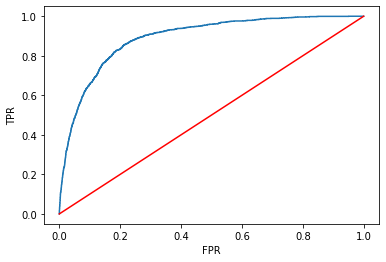

In [668]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**2)Random Undersampling**

In [669]:
from imblearn.under_sampling import RandomUnderSampler

In [670]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    us = RandomUnderSampler(sampling_strategy= i,random_state=3)
    X_resampled ,y_resampled = us.fit_resample(X_train, y_train)
    rf.fit(X_resampled, y_resampled)
    y_pred = rf.predict(X_test)
    y_pred_prob = rf.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result   

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.901135,0.490308,0.617816,0.406427,0.893977,0.15
1,0.898850,0.527873,0.581501,0.483302,0.893658,0.20
2,0.893763,0.543843,0.546438,0.541273,0.894077,0.25
3,0.887644,0.552291,0.517336,0.592313,0.893656,0.30
4,0.881967,0.550660,0.496457,0.618147,0.893601,0.35
5,0.874152,0.548532,0.472653,0.653434,0.893473,0.40
6,0.866632,0.546275,0.453750,0.686200,0.892900,0.45
7,0.860955,0.546852,0.441942,0.717076,0.892935,0.50
8,0.853436,0.541935,0.427170,0.741021,0.892656,0.55
9,0.847316,0.539675,0.416896,0.764965,0.893370,0.60


In [671]:
result[(result['recall'] >= 0.8) & (result['precision'] >= 0.38)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
13,0.82601,0.520909,0.384247,0.808444,0.892442,0.8


In [672]:
sampling = RandomUnderSampler(sampling_strategy=0.8,random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [673]:
rf.fit(X_resampled, y_resampled)
y_resampled_pred=rf.predict(X_resampled)
y_resampled_prob = rf.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[3908  719]
 [ 642 3060]]
Overall Accuracy - Train :  0.836595029415296
AUC - Train :  0.921584510244931
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      4627
           1       0.81      0.83      0.82      3702

    accuracy                           0.84      8329
   macro avg       0.83      0.84      0.83      8329
weighted avg       0.84      0.84      0.84      8329



Confusion Matrix - Test :  
 [[9916 2061]
 [ 306 1281]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.83      0.89     11977
           1       0.38      0.81      0.52      1587

    accuracy                           0.83     13564
   macro avg       0.68      0.82      0.71     13564
weighted avg       0.90      0.83      0.85     13564

F1 score - Test :  0.519780888618381
Overall Accuracy - Test :  0.825493954585668
AUC - Test :  0.8928534206420318


Text(0, 0.5, 'TPR')

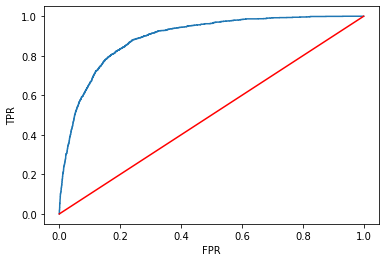

In [674]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**3)SMOTE Oversampling**

In [ ]:
from imblearn.over_sampling import SMOTE

In [675]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    smote = SMOTE(sampling_strategy= i,random_state=3)
    X_resampled ,y_resampled = smote.fit_resample(X_train, y_train)
    rf.fit(X_resampled, y_resampled)
    y_pred = rf.predict(X_test)
    y_pred_prob = rf.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result   

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.897891,0.477161,0.595104,0.398236,0.892233,0.15
1,0.893173,0.514247,0.549427,0.483302,0.889869,0.20
2,0.887570,0.517863,0.519670,0.516068,0.885494,0.25
3,0.881820,0.521921,0.495470,0.551355,0.883698,0.30
4,0.876364,0.523173,0.476684,0.579710,0.881163,0.35
5,0.869360,0.518216,0.455763,0.600504,0.879189,0.40
6,0.865453,0.520116,0.446300,0.623188,0.878255,0.45
7,0.863093,0.521268,0.441099,0.637051,0.876416,0.50
8,0.857785,0.517871,0.429163,0.652804,0.875207,0.55
9,0.855868,0.516926,0.425203,0.659105,0.873916,0.60


In [676]:
result[(result['recall'] >= 0.7) & (result['precision'] >= 0.38)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
14,0.838175,0.505073,0.393258,0.705734,0.870480,0.85
15,0.836110,0.505010,0.390496,0.714556,0.869919,0.90
16,0.831171,0.499563,0.382402,0.720227,0.868566,0.95
17,0.830286,0.499783,0.381426,0.724638,0.868002,1.00


In [677]:
sampling = SMOTE(sampling_strategy=0.85,random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [678]:
rf.fit(X_resampled, y_resampled)
y_resampled_pred=rf.predict(X_resampled)
y_resampled_prob = rf.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[24394  3551]
 [ 2380 21373]]
Overall Accuracy - Train :  0.8852760261518821
AUC - Train :  0.9587937147651648
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.91      0.87      0.89     27945
           1       0.86      0.90      0.88     23753

    accuracy                           0.89     51698
   macro avg       0.88      0.89      0.88     51698
weighted avg       0.89      0.89      0.89     51698



Confusion Matrix - Test :  
 [[10263  1714]
 [  466  1121]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.86      0.90     11977
           1       0.40      0.71      0.51      1587

    accuracy                           0.84     13564
   macro avg       0.68      0.78      0.71     13564
weighted avg       0.89      0.84      0.86     13564

F1 score - Test :  0.5070104025327906
Overall Accuracy - Test :  0.8392804482453553
AUC - Test :  0.8695267851914656


Text(0, 0.5, 'TPR')

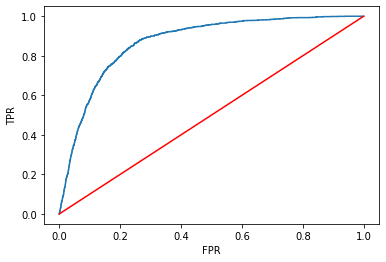

In [679]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**4)Combining SMOTE and Random Undersampling**

In [680]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    over_sampling = SMOTE(sampling_strategy= i,random_state=3)
    X_resampled ,y_resampled = over_sampling.fit_resample(X_train, y_train)
    
    for j in np.arange(i,1,0.05):
        under_sampler = RandomUnderSampler(sampling_strategy = np.round(j,2), random_state=3)
        X_under ,y_under = under_sampler.fit_resample(X_resampled ,y_resampled)
        rf.fit(X_under ,y_under)
        y_pred = rf.predict(X_test)
        y_pred_prob = rf.predict_proba(X_test)[:,1]
        result = result.append({'sample_strategy_o':i,
                                'sample_strategy_u':np.round(j,2),
                                'accuracy':accuracy_score(y_test,y_pred),
                                  'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                                  'precision':precision_score(y_test, y_pred), 
                                  'recall':recall_score(y_test, y_pred),
                                  'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
print("done")   
result

done


,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy_o,sample_strategy_u
0,0.898555,0.480755,0.599247,0.401386,0.891876,0.15,0.15
1,0.895459,0.516371,0.562825,0.477001,0.892759,0.15,0.20
2,0.892362,0.541745,0.539712,0.543793,0.893115,0.15,0.25
3,0.885358,0.545720,0.508715,0.588532,0.892882,0.15,0.30
4,0.880787,0.550459,0.492537,0.623819,0.892421,0.15,0.35
...,...,...,...,...,...,...,...
151,0.826010,0.500000,0.376636,0.743541,0.869593,0.85,1.00
152,0.836553,0.502580,0.390244,0.705734,0.868859,0.90,0.90
153,0.832793,0.503067,0.385623,0.723377,0.869136,0.90,0.95
154,0.832203,0.501533,0.384357,0.721487,0.868802,0.95,0.95


In [682]:
result[(result['recall'] >= 0.79) & (result['precision'] >= 0.39)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy_o,sample_strategy_u
12,0.835594,0.530724,0.398420,0.794581,0.892168,0.15,0.75
28,0.833088,0.528333,0.394647,0.798992,0.888100,0.20,0.75
44,0.830950,0.522590,0.390236,0.790800,0.885167,0.25,0.80


In [692]:
over_sampling = SMOTE(sampling_strategy= 0.2,random_state=3)
X_over_sampled ,y_over_sampled = over_sampling.fit_resample(X_train, y_train)
under_sampler = RandomUnderSampler(sampling_strategy = 0.75, random_state=3)
X_resampled ,y_resampled = under_sampler.fit_resample(X_over_sampled ,y_over_sampled)

In [693]:
rf.fit(X_resampled, y_resampled)
y_resampled_pred=rf.predict(X_resampled)
y_resampled_prob = rf.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[6383 1069]
 [ 865 4724]]
Overall Accuracy - Train :  0.8516984893796488
AUC - Train :  0.9311300560000777
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      7452
           1       0.82      0.85      0.83      5589

    accuracy                           0.85     13041
   macro avg       0.85      0.85      0.85     13041
weighted avg       0.85      0.85      0.85     13041



Confusion Matrix - Test :  
 [[10037  1940]
 [  327  1260]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     11977
           1       0.39      0.79      0.53      1587

    accuracy                           0.83     13564
   macro avg       0.68      0.82      0.71     13564
weighted avg       0.90      0.83      0.85     13564

F1 score - Test :  0.5264257363693337
Overall Accuracy - Test :  0.8328664110881746
AUC - Test :  0.8875133177700022


Text(0, 0.5, 'TPR')

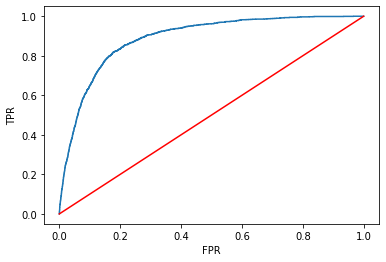

In [694]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**5) Combination of Random Oversampling and Random Undersampling**

In [695]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    over_sampling = RandomOverSampler(sampling_strategy= i,random_state=3)
    X_resampled ,y_resampled = over_sampling.fit_resample(X_train, y_train)
    
    for j in np.arange(i,1,0.05):
        under_sampler = RandomUnderSampler(sampling_strategy = np.round(j,2), random_state=3)
        X_under ,y_under = under_sampler.fit_resample(X_resampled ,y_resampled)
        rf.fit(X_under ,y_under)
        y_pred = rf.predict(X_test)
        y_pred_prob = rf.predict_proba(X_test)[:,1]
        result = result.append({'sample_strategy_o':i,
                                'sample_strategy_u':np.round(j,2),
                                'accuracy':accuracy_score(y_test,y_pred),
                                  'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                                  'precision':precision_score(y_test, y_pred), 
                                  'recall':recall_score(y_test, y_pred),
                                  'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
print("done")   

done


In [696]:
result[(result['recall'] >= 0.8) & (result['precision'] >= 0.39)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy_o,sample_strategy_u
59,0.83036,0.525665,0.390625,0.803403,0.892084,0.3,0.85


In [697]:
over_sampling = RandomOverSampler(sampling_strategy= 0.3,random_state=3)
X_over_sampled ,y_over_sampled = over_sampling.fit_resample(X_train, y_train)
under_sampler = RandomUnderSampler(sampling_strategy = 0.85, random_state=3)
X_resampled ,y_resampled = under_sampler.fit_resample(X_over_sampled ,y_over_sampled)

In [698]:
rf.fit(X_resampled, y_resampled)
y_resampled_pred=rf.predict(X_resampled)
y_resampled_prob = rf.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[8429 1433]
 [1188 7195]]
Overall Accuracy - Train :  0.8563442038914771
AUC - Train :  0.9383794587906452
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      9862
           1       0.83      0.86      0.85      8383

    accuracy                           0.86     18245
   macro avg       0.86      0.86      0.86     18245
weighted avg       0.86      0.86      0.86     18245



Confusion Matrix - Test :  
 [[10013  1964]
 [  319  1268]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     11977
           1       0.39      0.80      0.53      1587

    accuracy                           0.83     13564
   macro avg       0.68      0.82      0.71     13564
weighted avg       0.90      0.83      0.85     13564

F1 score - Test :  0.5262502593899149
Overall Accuracy - Test :  0.8316868180477736
AUC - Test :  0.8923802652837177


Text(0, 0.5, 'TPR')

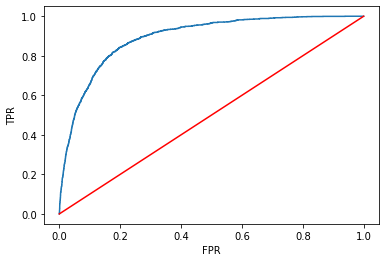

In [699]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**6) Borderline SMOTE oversampling**

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

In [700]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    sampling = BorderlineSMOTE(sampling_strategy= i)
    X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)
    rf.fit(X_resampled, y_resampled)
    y_pred = rf.predict(X_test)
    y_pred_prob = rf.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result  

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.897965,0.476551,0.596026,0.396975,0.892660,0.15
1,0.890593,0.506977,0.536191,0.480781,0.889444,0.20
2,0.885063,0.519569,0.508444,0.531191,0.886912,0.25
3,0.880198,0.521637,0.489503,0.558286,0.884407,0.30
4,0.873710,0.521642,0.468405,0.588532,0.883141,0.35
5,0.870245,0.517279,0.457989,0.594203,0.881282,0.40
6,0.866190,0.521487,0.448323,0.623188,0.880502,0.45
7,0.863241,0.518307,0.440813,0.628859,0.878668,0.50
8,0.860808,0.521055,0.436093,0.647133,0.877223,0.55
9,0.857933,0.520050,0.429984,0.657845,0.876646,0.60


In [703]:
result[(result['recall'] >= 0.7) & (result['precision'] >= 0.35)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
14,0.846358,0.516922,0.408874,0.702583,0.874489,0.85
15,0.845621,0.517956,0.408052,0.708885,0.874070,0.90
16,0.840018,0.511481,0.397898,0.715816,0.872332,0.95
17,0.840239,0.512705,0.398601,0.718336,0.871649,1.00


In [704]:
sampling = BorderlineSMOTE(sampling_strategy= 0.9,random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [705]:
rf.fit(X_resampled, y_resampled)
y_resampled_pred=rf.predict(X_resampled)
y_resampled_prob = rf.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[24538  3407]
 [ 1944 23206]]
Overall Accuracy - Train :  0.8992183821452114
AUC - Train :  0.9668165706067762
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     27945
           1       0.87      0.92      0.90     25150

    accuracy                           0.90     53095
   macro avg       0.90      0.90      0.90     53095
weighted avg       0.90      0.90      0.90     53095



Confusion Matrix - Test :  
 [[10315  1662]
 [  483  1104]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.86      0.91     11977
           1       0.40      0.70      0.51      1587

    accuracy                           0.84     13564
   macro avg       0.68      0.78      0.71     13564
weighted avg       0.89      0.84      0.86     13564

F1 score - Test :  0.50723638869745
Overall Accuracy - Test :  0.8418608080212326
AUC - Test :  0.8730913256920335


Text(0, 0.5, 'TPR')

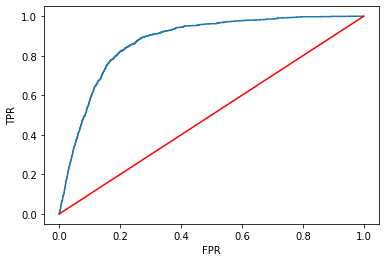

In [706]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**7)SVM SMOTE**

In [ ]:
from imblearn.over_sampling import SVMSMOTE

In [707]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.8,0.85,0.9,0.95,1]
for i in ss:
    sampling = SVMSMOTE(sampling_strategy= i)
    X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)
    rf.fit(X_resampled, y_resampled)
    y_pred = rf.predict(X_test)
    y_pred_prob = rf.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result  

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.900840,0.486837,0.617021,0.402016,0.892834,0.15
1,0.894721,0.516588,0.558157,0.480781,0.891772,0.20
2,0.893394,0.526212,0.548123,0.505986,0.891568,0.25
3,0.889266,0.536991,0.525649,0.548834,0.890740,0.30
4,0.879460,0.534321,0.487526,0.591052,0.888675,0.35
5,0.883663,0.544194,0.502400,0.593573,0.888759,0.40
6,0.877986,0.538612,0.483000,0.608696,0.887423,0.45
7,0.875332,0.539864,0.475096,0.625079,0.887037,0.50
8,0.871424,0.536417,0.463908,0.635791,0.887302,0.55
9,0.868107,0.536888,0.455624,0.653434,0.885860,0.60


In [709]:
result[(result['recall'] >= 0.7) & (result['precision'] >= 0.35)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
16,0.852256,0.530679,0.422288,0.713926,0.883232,0.95


In [710]:
sampling = SVMSMOTE(sampling_strategy= 0.95,random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [711]:
rf.fit(X_resampled, y_resampled)
y_resampled_pred=rf.predict(X_resampled)
y_resampled_prob = rf.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[24562  3383]
 [ 1924 24623]]
Overall Accuracy - Train :  0.9026095573662188
AUC - Train :  0.9700450861809196
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     27945
           1       0.88      0.93      0.90     26547

    accuracy                           0.90     54492
   macro avg       0.90      0.90      0.90     54492
weighted avg       0.90      0.90      0.90     54492



Confusion Matrix - Test :  
 [[10384  1593]
 [  460  1127]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.87      0.91     11977
           1       0.41      0.71      0.52      1587

    accuracy                           0.85     13564
   macro avg       0.69      0.79      0.72     13564
weighted avg       0.89      0.85      0.86     13564

F1 score - Test :  0.5233341072672395
Overall Accuracy - Test :  0.8486434680035387
AUC - Test :  0.8821723731249441


Text(0, 0.5, 'TPR')

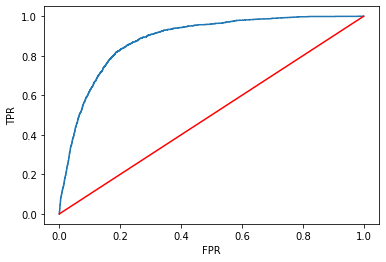

In [712]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**8)ADASYN**

In [ ]:
from imblearn.over_sampling import ADASYN

In [713]:
result= pd.DataFrame()
ss  = [0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.8,0.85,0.9,0.95,1]
for i in ss:
    sampling = ADASYN(sampling_strategy= i)
    X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)
    rf.fit(X_resampled, y_resampled)
    y_pred = rf.predict(X_test)
    y_pred_prob = rf.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result  

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.888381,0.504581,0.524847,0.485822,0.884109,0.20
1,0.886759,0.514845,0.516149,0.513548,0.884670,0.25
2,0.879755,0.517884,0.487751,0.551985,0.879781,0.30
3,0.874373,0.516733,0.469830,0.574039,0.878268,0.35
4,0.866780,0.516716,0.448885,0.608696,0.875650,0.40
5,0.864347,0.519582,0.443602,0.626969,0.875005,0.45
6,0.858449,0.512443,0.429179,0.635791,0.871954,0.50
7,0.854763,0.508483,0.420900,0.642092,0.872835,0.55
8,0.848054,0.505162,0.408068,0.662886,0.870258,0.60
9,0.847538,0.505263,0.407250,0.665406,0.869342,0.65


In [715]:
result[(result['recall'] >= 0.7) & (result['precision'] >= 0.35)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
12,0.831834,0.493449,0.381001,0.700063,0.864697,0.80
13,0.831908,0.494681,0.381538,0.703214,0.865214,0.85
14,0.828664,0.495879,0.378101,0.720227,0.864064,0.90
15,0.821881,0.485739,0.366763,0.718967,0.862358,0.95
16,0.821292,0.484913,0.365822,0.718967,0.861949,1.00


In [716]:
sampling = ADASYN(sampling_strategy= 0.9,random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [717]:
rf.fit(X_resampled, y_resampled)
y_resampled_pred=rf.predict(X_resampled)
y_resampled_prob = rf.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[24044  3901]
 [ 2366 22439]]
Overall Accuracy - Train :  0.8811943127962085
AUC - Train :  0.9554534010838305
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.91      0.86      0.88     27945
           1       0.85      0.90      0.88     24805

    accuracy                           0.88     52750
   macro avg       0.88      0.88      0.88     52750
weighted avg       0.88      0.88      0.88     52750



Confusion Matrix - Test :  
 [[10081  1896]
 [  459  1128]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.84      0.90     11977
           1       0.37      0.71      0.49      1587

    accuracy                           0.83     13564
   macro avg       0.66      0.78      0.69     13564
weighted avg       0.89      0.83      0.85     13564

F1 score - Test :  0.4892648015614834
Overall Accuracy - Test :  0.8263786493659687
AUC - Test :  0.8628616789615509


Text(0, 0.5, 'TPR')

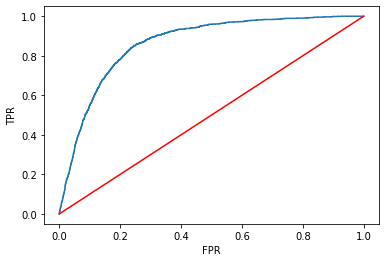

In [718]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**9) Tomek Links**

In [ ]:
from imblearn.under_sampling import TomekLinks

In [719]:
sampling = TomekLinks(sampling_strategy='majority',random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [720]:
rf.fit(X_resampled, y_resampled)
y_resampled_pred=rf.predict(X_resampled)
y_resampled_prob = rf.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[25861   642]
 [ 1942  1760]]
Overall Accuracy - Train :  0.9144512497930806
AUC - Train :  0.940980769880327
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     26503
           1       0.73      0.48      0.58      3702

    accuracy                           0.91     30205
   macro avg       0.83      0.73      0.76     30205
weighted avg       0.91      0.91      0.91     30205



Confusion Matrix - Test :  
 [[11528   449]
 [  907   680]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     11977
           1       0.60      0.43      0.50      1587

    accuracy                           0.90     13564
   macro avg       0.76      0.70      0.72     13564
weighted avg       0.89      0.90      0.89     13564

F1 score - Test :  0.5007363770250367
Overall Accuracy - Test :  0.90002948982601
AUC - Test :  0.8936161196167892


Text(0, 0.5, 'TPR')

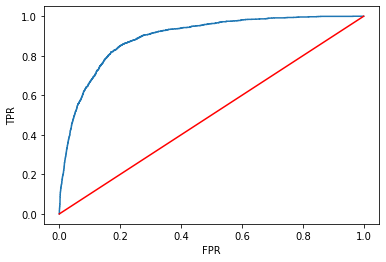

In [721]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**10) Edited Nearest Neighbors**

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

In [722]:
sampling = EditedNearestNeighbours(sampling_strategy='majority',random_state=3)
X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)

In [723]:
rf.fit(X_resampled, y_resampled)
y_resampled_pred=rf.predict(X_resampled)
y_resampled_prob = rf.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[21490   521]
 [ 1403  2299]]
Overall Accuracy - Train :  0.9251740364796017
AUC - Train :  0.9605325891643834
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     22011
           1       0.82      0.62      0.70      3702

    accuracy                           0.93     25713
   macro avg       0.88      0.80      0.83     25713
weighted avg       0.92      0.93      0.92     25713



Confusion Matrix - Test :  
 [[11063   914]
 [  636   951]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     11977
           1       0.51      0.60      0.55      1587

    accuracy                           0.89     13564
   macro avg       0.73      0.76      0.74     13564
weighted avg       0.89      0.89      0.89     13564

F1 score - Test :  0.5509849362688297
Overall Accuracy - Test :  0.8857269242111472
AUC - Test :  0.8903116869820695


Text(0, 0.5, 'TPR')

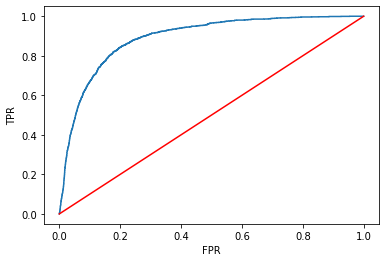

In [724]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**11) SMOTE Tomek**

In [ ]:
from imblearn.combine import SMOTETomek

In [725]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    sampling = SMOTETomek(sampling_strategy=i,random_state=3)
    X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)
    rf.fit(X_resampled, y_resampled)
    y_pred = rf.predict(X_test)
    y_pred_prob = rf.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result  

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.898997,0.455485,0.616792,0.361059,0.891875,0.15
1,0.895016,0.506241,0.562837,0.459987,0.889735,0.20
2,0.889339,0.514082,0.528628,0.500315,0.887616,0.25
3,0.883663,0.522397,0.502621,0.543793,0.884520,0.30
4,0.877101,0.526016,0.479275,0.582861,0.883890,0.35
5,0.871940,0.524761,0.463733,0.604285,0.881026,0.40
6,0.865821,0.522811,0.447687,0.628229,0.879151,0.45
7,0.862946,0.522231,0.440972,0.640202,0.878558,0.50
8,0.858670,0.520630,0.431592,0.655955,0.876757,0.55
9,0.854615,0.517140,0.422907,0.665406,0.876254,0.60


In [730]:
result[(result['recall'] >= 0.7) & (result['precision'] >= 0.38)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
12,0.844294,0.515596,0.405337,0.708255,0.873419,0.75
13,0.842229,0.510969,0.400861,0.704474,0.872277,0.80
14,0.836774,0.506684,0.391934,0.716446,0.871492,0.85
15,0.835078,0.504321,0.388927,0.717076,0.870769,0.90
16,0.831761,0.504774,0.384972,0.732829,0.869477,0.95
17,0.829401,0.502151,0.381248,0.735350,0.869894,1.00


In [731]:
smote_tomek = SMOTETomek(sampling_strategy=0.75,random_state=3)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

In [732]:
rf.fit(X_resampled, y_resampled)
y_resampled_pred=rf.predict(X_resampled)
y_resampled_prob = rf.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[23774  3139]
 [ 2161 17765]]
Overall Accuracy - Train :  0.8868464313926429
AUC - Train :  0.9600664322519761
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     26913
           1       0.85      0.89      0.87     19926

    accuracy                           0.89     46839
   macro avg       0.88      0.89      0.88     46839
weighted avg       0.89      0.89      0.89     46839



Confusion Matrix - Test :  
 [[10314  1663]
 [  468  1119]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.86      0.91     11977
           1       0.40      0.71      0.51      1587

    accuracy                           0.84     13564
   macro avg       0.68      0.78      0.71     13564
weighted avg       0.89      0.84      0.86     13564

F1 score - Test :  0.5122453650720988
Overall Accuracy - Test :  0.8428929519315836
AUC - Test :  0.874038057295176


Text(0, 0.5, 'TPR')

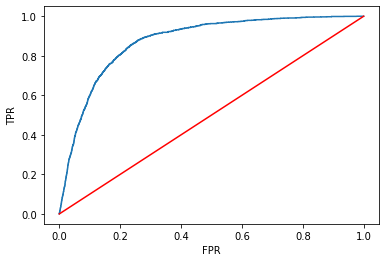

In [733]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

**12) SMOTE ENN**

In [ ]:
from imblearn.combine import SMOTEENN

In [734]:
result= pd.DataFrame()
ss  = [0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]
for i in ss:
    sampling = SMOTEENN(sampling_strategy=i,random_state=3)
    X_resampled ,y_resampled = sampling.fit_resample(X_train, y_train)
    rf.fit(X_resampled, y_resampled)
    y_pred = rf.predict(X_test)
    y_pred_prob = rf.predict_proba(X_test)[:,1]
    result = result.append({'sample_strategy':i,
                            'accuracy':accuracy_score(y_test,y_pred),
                              'roc_auc_score':roc_auc_score(y_test,y_pred_prob),
                              'precision':precision_score(y_test, y_pred), 
                              'recall':recall_score(y_test, y_pred),
                              'f1_score':f1_score(y_test,y_pred)}, ignore_index=True)
    
    
result  

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
0,0.889855,0.293283,0.588235,0.195337,0.851347,0.15
1,0.889634,0.406188,0.548180,0.322621,0.866013,0.20
2,0.884842,0.462491,0.509477,0.423440,0.869451,0.25
3,0.879165,0.496776,0.484431,0.509767,0.878791,0.30
4,0.875922,0.520922,0.475078,0.576560,0.878031,0.35
5,0.867664,0.533645,0.454023,0.647133,0.877454,0.40
6,0.859850,0.530501,0.436231,0.676749,0.879518,0.45
7,0.854320,0.530418,0.425792,0.703214,0.880602,0.50
8,0.846948,0.526892,0.412710,0.728418,0.880415,0.55
9,0.839502,0.519532,0.399796,0.741651,0.879504,0.60


In [735]:
result[(result['recall'] >= 0.75) & (result['precision'] >= 0.38)]

,accuracy,f1_score,precision,recall,roc_auc_score,sample_strategy
10,0.835299,0.521217,0.394933,0.766226,0.881704,0.65
11,0.830434,0.517617,0.387928,0.777568,0.881137,0.70


In [736]:
smote_enn = SMOTEENN(sampling_strategy=0.65,random_state=3)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [737]:
rf.fit(X_resampled, y_resampled)
y_resampled_pred=rf.predict(X_resampled)
y_resampled_prob = rf.predict_proba(X_resampled)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_resampled,y_resampled_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_resampled,y_resampled_pred))
print('AUC - Train : ' , roc_auc_score(y_resampled,y_resampled_prob))
print('Classification Report - Train : ','\n' , classification_report(y_resampled,y_resampled_pred))

Confusion Matrix - Train :  
 [[17900  1265]
 [ 1072 11669]]
Overall Accuracy - Train :  0.9267535886667084
AUC - Train :  0.9824528306870718
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.94      0.93      0.94     19165
           1       0.90      0.92      0.91     12741

    accuracy                           0.93     31906
   macro avg       0.92      0.92      0.92     31906
weighted avg       0.93      0.93      0.93     31906



Confusion Matrix - Test :  
 [[10116  1861]
 [  377  1210]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.96      0.84      0.90     11977
           1       0.39      0.76      0.52      1587

    accuracy                           0.84     13564
   macro avg       0.68      0.80      0.71     13564
weighted avg       0.90      0.84      0.86     13564

F1 score - Test :  0.519536281665951
Overall Accuracy - Test :  0.8350044234739015
AUC - Test :  0.881557747287005


Text(0, 0.5, 'TPR')

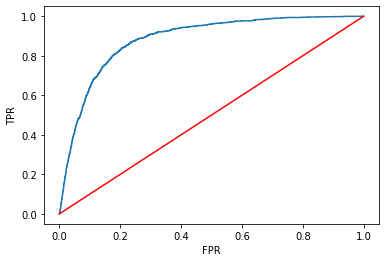

In [738]:
y_test_pred=rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

Using Random forest classifier also, we receiving best results by sampling with the combination of SMOTE and Random undersampler and Random Oversampler and Random Undersampler

The best performance was given by the Light GBM algorithm, with a resampling combination of SMOTE and Random undersampling.

The results are :

AUC Score : 0.895\
Accuracy : 0.84\
F1 Score : 0.53\
Recall : 0.8\
Precision : 0.4

### **END**